# Bussiness case : To identify whether the patient has an anomaly or abnormal functioning of the liver

In [1]:
# Importion all the necessary Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### NOTE : The labels for column is reffered from the kaggle dataset.

In [3]:
# Changing the column name.
df.set_axis(['age', 'gender', 'TotalBilirubin', 'DirectBilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'TotalProtiens', 'Albumin',
       'AlbuminandGlobulinRatio', 'disease'],axis=1,inplace=True)

In [4]:
df

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


# Basic Check :

In [5]:
df.head()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.tail()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [7]:
df.describe()

,age,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Insight :
1. Average age of the patient is observed 44.74, with minimum age 4 and maximum age 90 yrs respectively.
2. The Total_bilirubin ranges from 0.4 to 75.
3. Direct bilirubin ranges between 0.1 to 19.7 with std devation 2.8.
4. Average Alkaline_Phosphotase observed in the patients is 290.57 which comes from the range of 63 to 2110.
5. Alamine_Aminotransferase ranges between 10 to 2000 with std deviation 182.62
6. Aspartate_Aminotransferase have mean(average) of 109.91 and it ranges in between 10 to 4929.
7. Average TotalProtiens available in the patients is 6.4.
8. Albumin ranges form 0.9 to 5.50 with std devation of 0.79
9. AlbuminandGlobulinRatio ranges from 0.30 to 2.80.

In [8]:
df.describe(include='O')

,gender
count,583
unique,2
top,Male
freq,441


## Insight :
* As we can see here we have only one categorical feature available in our dataset, which is gender and in that the count of male is more than female viz 441.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   TotalBilirubin              583 non-null    float64
 3   DirectBilirubin             583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   TotalProtiens               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   AlbuminandGlobulinRatio     579 non-null    float64
 10  disease                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Insight :

* We have 5 features with float datatype 5 features with int datatype and 1 feature with object datatype.

In [10]:
df.isnull().sum()

age                           0
gender                        0
TotalBilirubin                0
DirectBilirubin               0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
TotalProtiens                 0
Albumin                       0
AlbuminandGlobulinRatio       4
disease                       0
dtype: int64

## Insights :
1. In AlbuminandGlobulinRatio we have 4 missing values which we need to impute in datapreprocessing pipeline.

## DOMAIN ANALYSIS :
1. Age : Age of patient.

2. Gender : Gender of the patient.

3. TotalBilirubin : Bilirubin is made during the normal process of breaking down red blood cells. It is a yellowish substance found in bile, a fluid in your liver. This fluid helps digest food. A healthy liver moves most of the bilirubin from your body.Normal range for total Bilirubin is  0.1 to 1.2 mg/dL.

4. DirectBilirubin : Normal range of Direct Bilirubin is less than 0.3 mg/dL (less than 5.1 µmol/L).

5. Alkaline_Phosphotase : ALP is an enzyme found in your bloodstream. It helps break down proteins in the body and exists in different forms, depending on where it originates. Your liver is one of the main sources of ALP, but some is also made in your bones, intestines, pancreas, and kidneys. In pregnant people, ALP is made in the placenta.

6. Alamine_Aminotransferase : The function of ALT is to convert alanine into pyruvate, for cellular energy production. Alanine aminotransferase (ALT) is an enzyme found mostly in liver cells. Apart from the liver, it is also found in heart and muscle cells. 

7. Aspartate_Aminotransferase : Aspartate aminotransferase is a part of the malate-aspartate shuttle in the myocardium, is involved in gluconeogenesis in the liver and kidney, glyceroneogenesis in the adipose tissue, and synthesis of neurotransmitters and neuro-glial pathway in the brain.

8. TotalProtiens : Proteins are important building blocks of all cells and tissues; they are important for body growth, development, and health. They form the structural part of most organs and make up enzymes and hormones that regulate body functions. Two classes of proteins are found in the blood, albumin and globulin.

9. Albumin : Albumin is a protein made by your liver. Albumin enters your bloodstream and helps keep fluid from leaking out of your blood vessels into other tissues. It is also carries hormones, vitamins, and enzymes throughout your body.

10. AlbuminandGlobulinRatio : Albumin, which helps keep blood from leaking out of blood vessels. It also helps move hormones, medicines, vitamins, and other important substances throughout the body. Albumin is made in the liver. Globulins, which help fight infection and move nutrients throughout the body. An imbalance in the ratio of albumin to globulin may signify ongoing inflammation, liver problems, or in rare cases immunodeficiency.

11. disease : In this column 1 represents the patient does not have any liver disease and 2 denotes the patient have liver disease.


## Univariate Analysis :

                                             |                                             | [  0%]   00:00 ->…


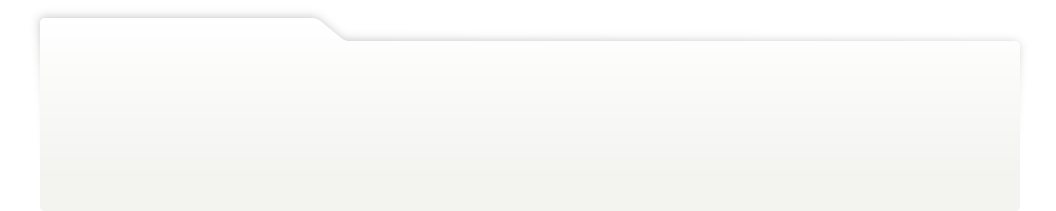
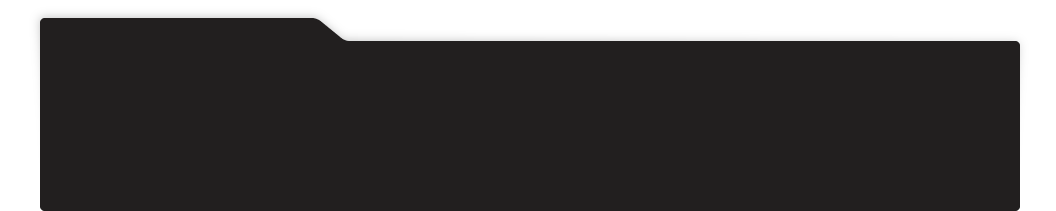
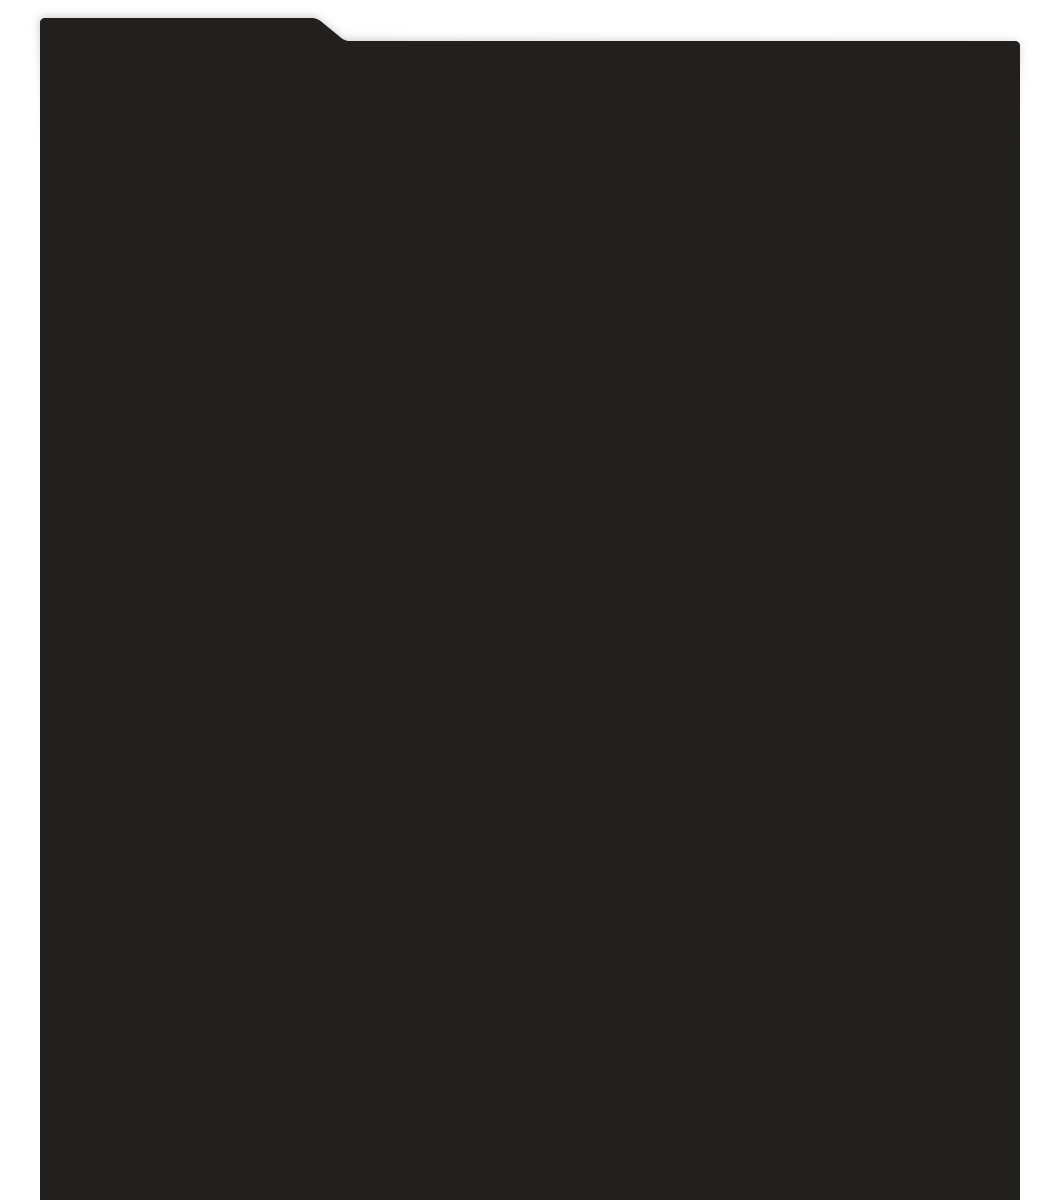
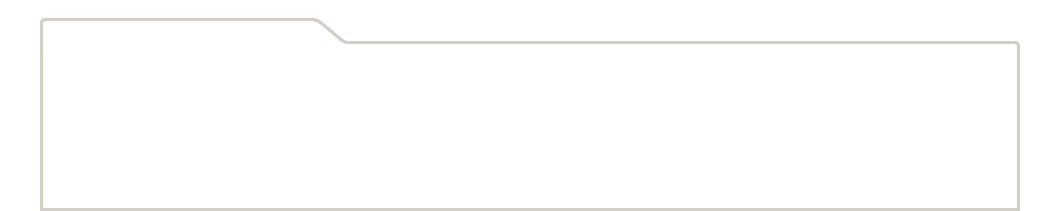
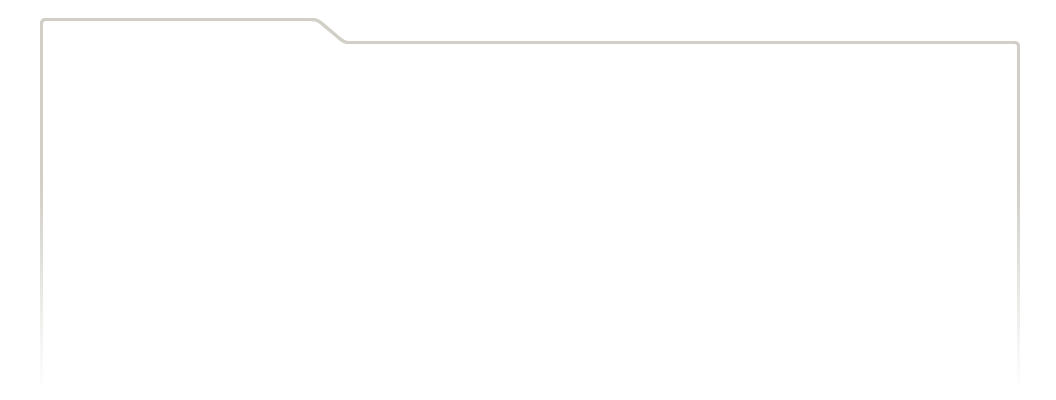
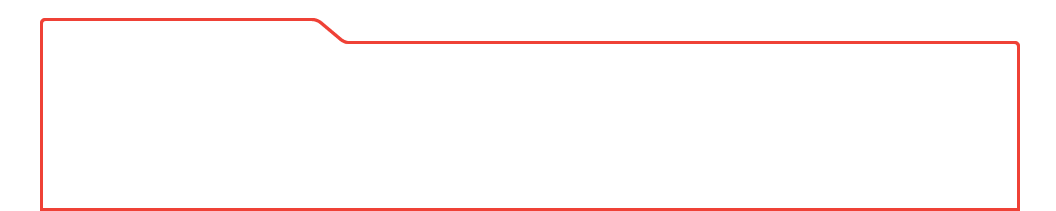
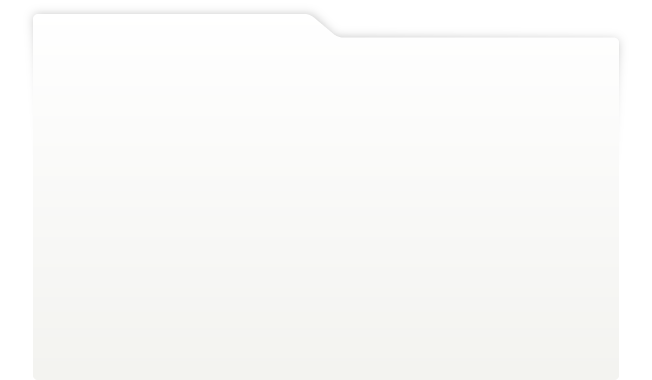
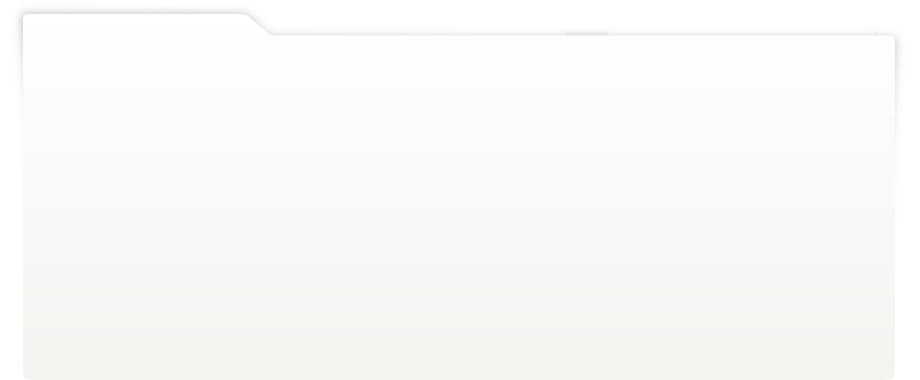
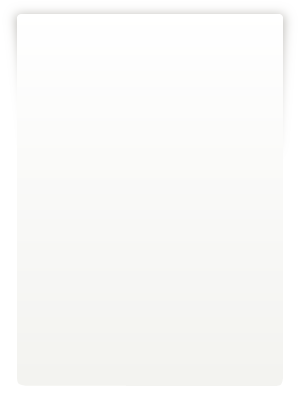
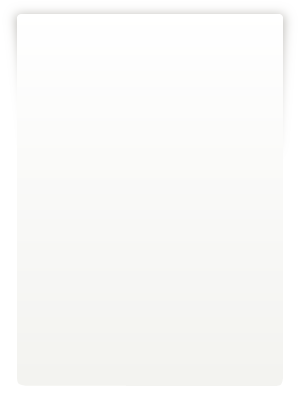
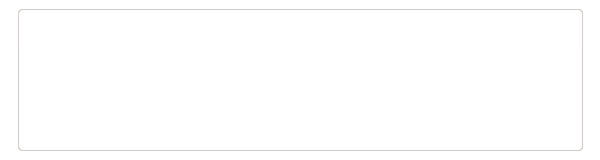
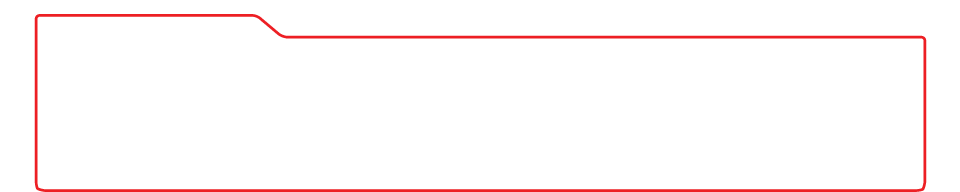
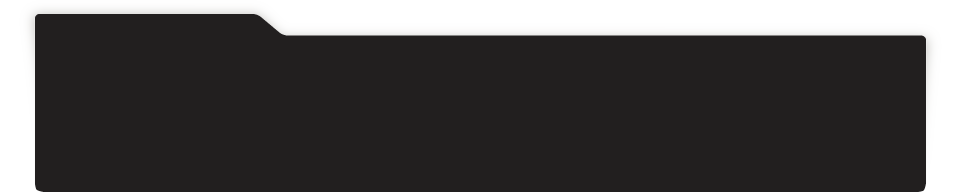
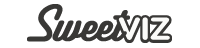
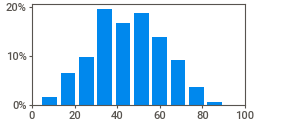
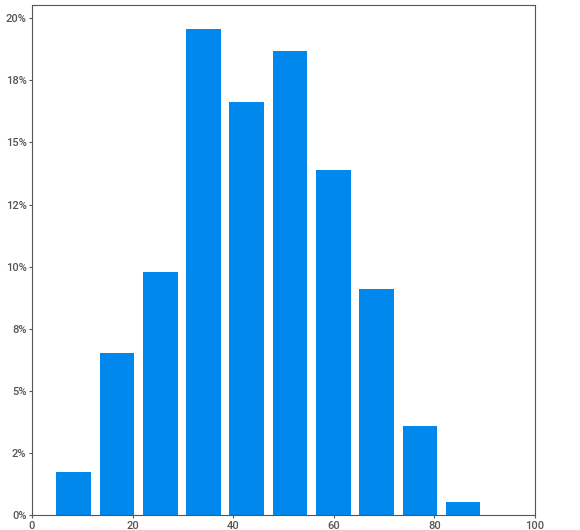
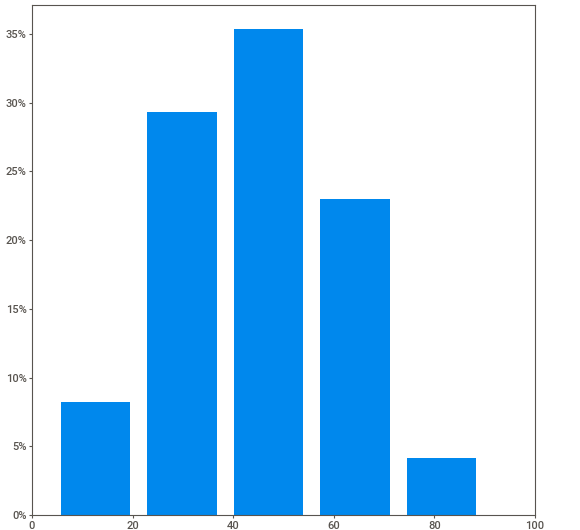
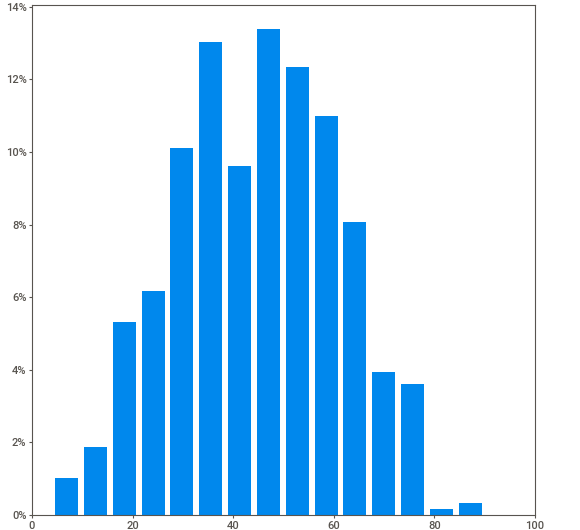
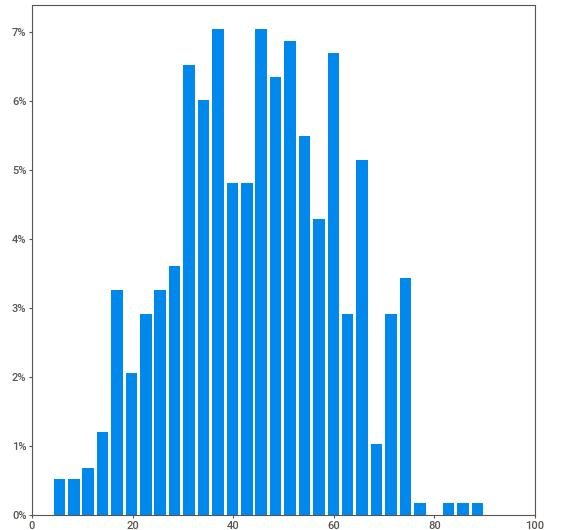
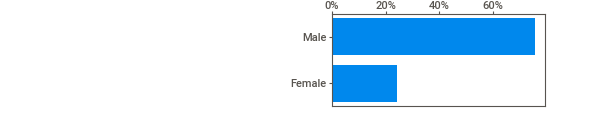
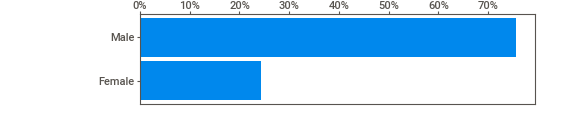
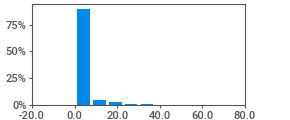
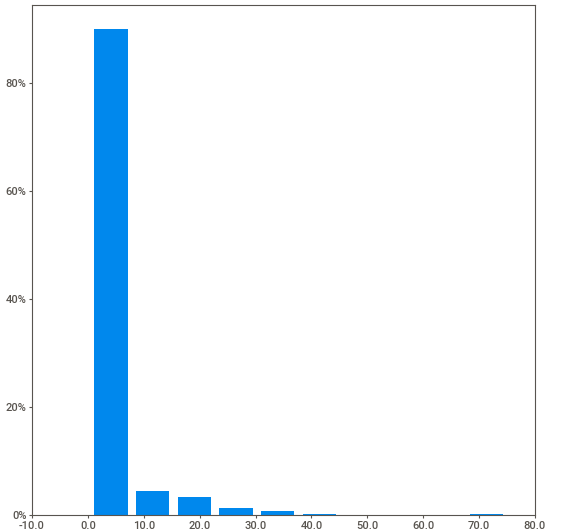
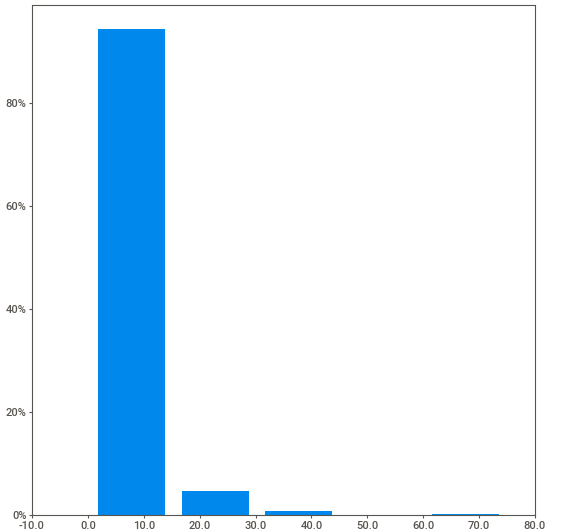
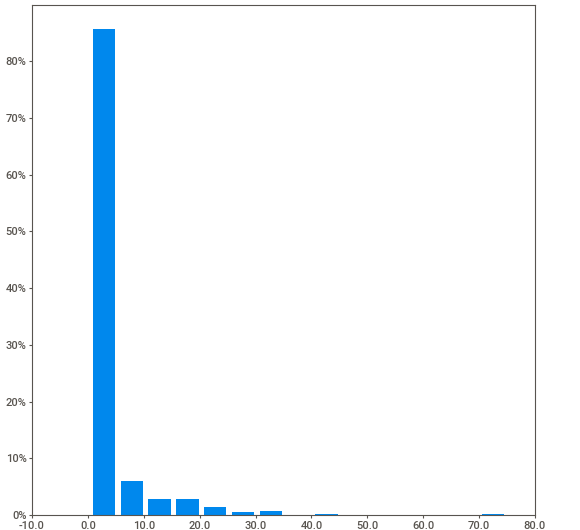
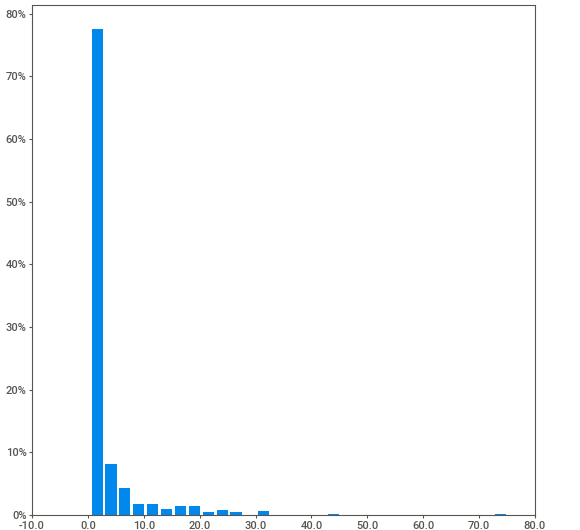
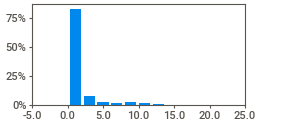
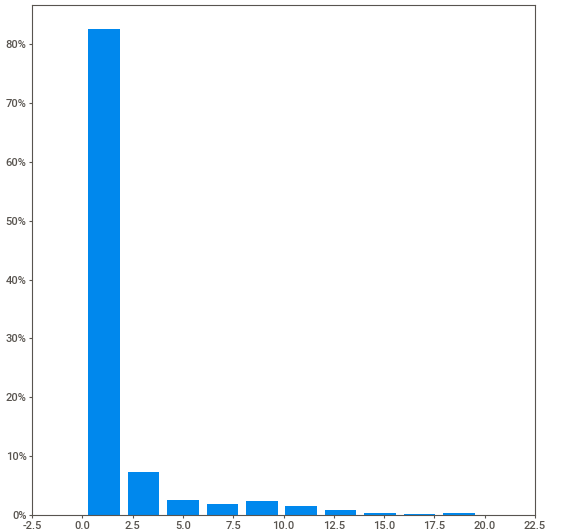
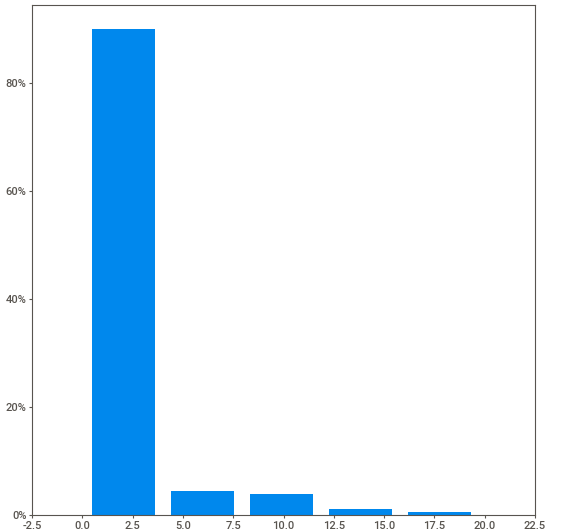
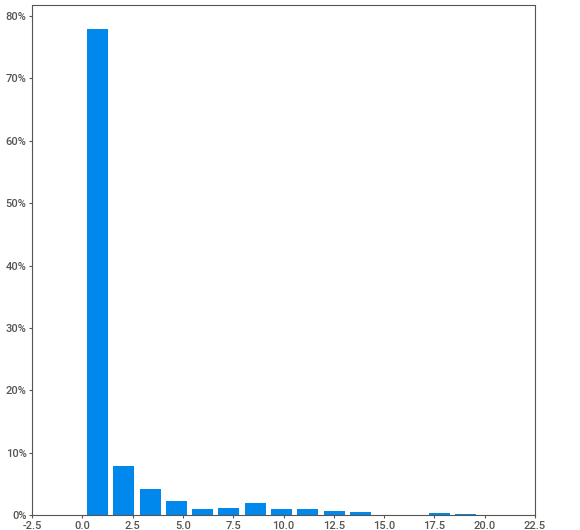
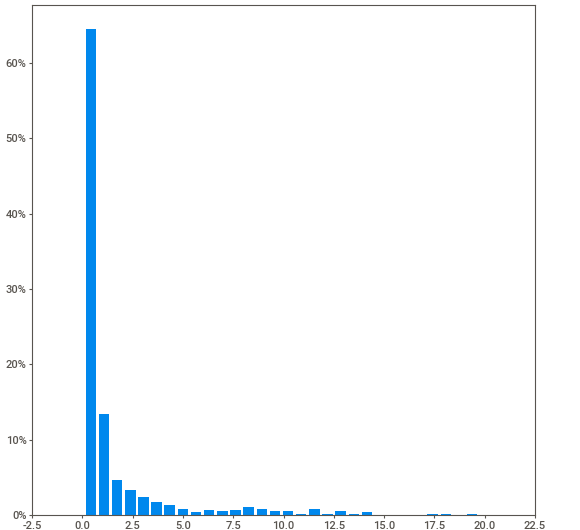
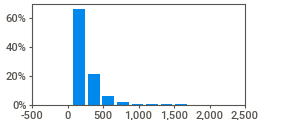
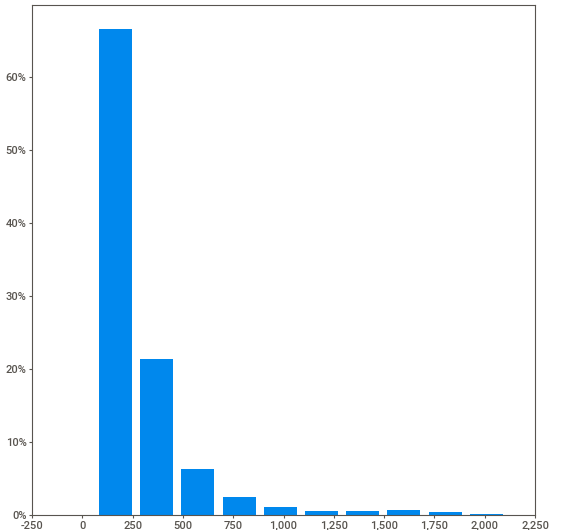
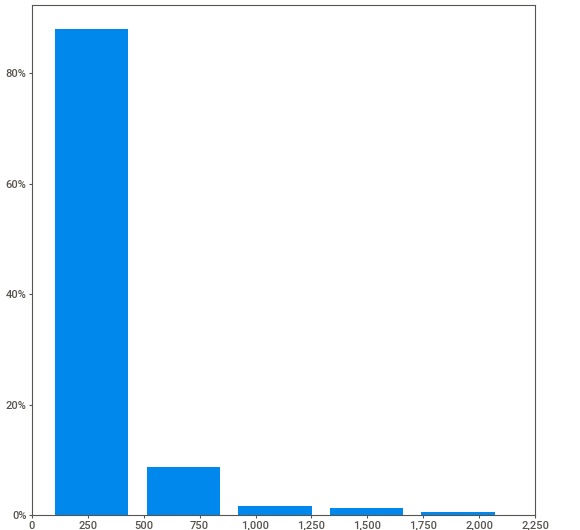
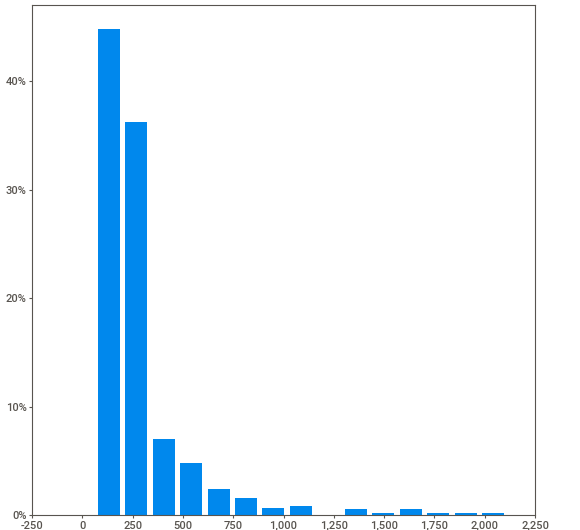
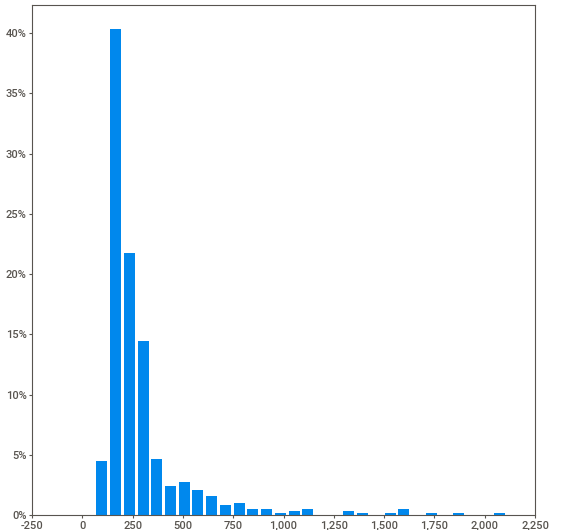
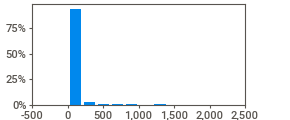
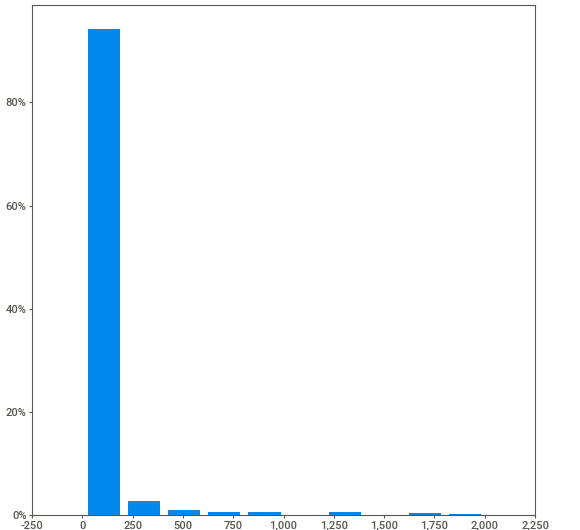
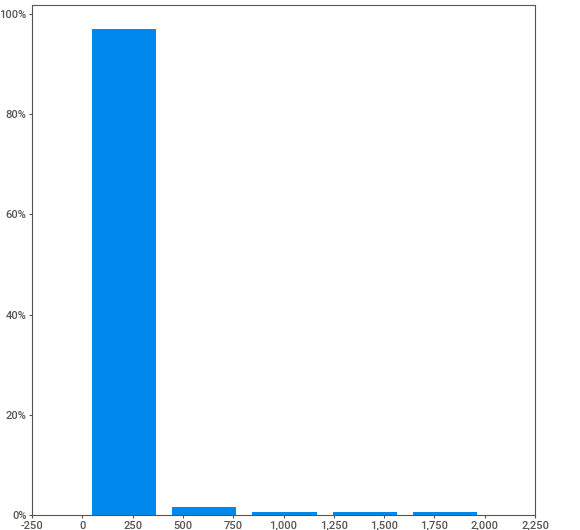
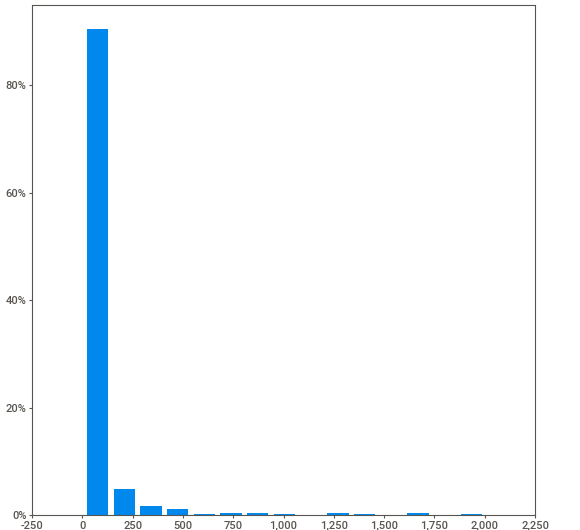
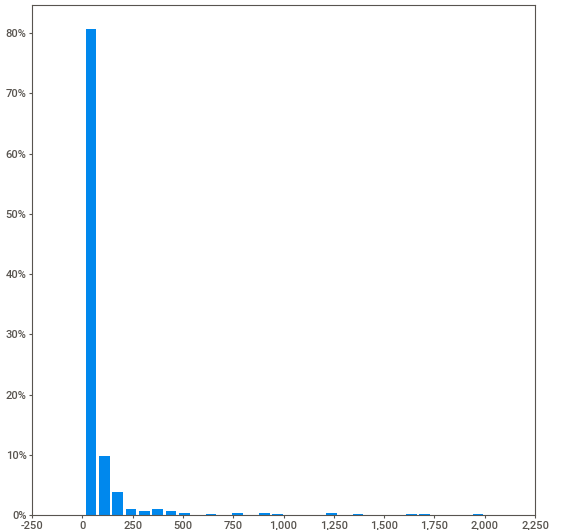
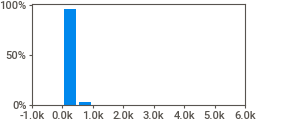
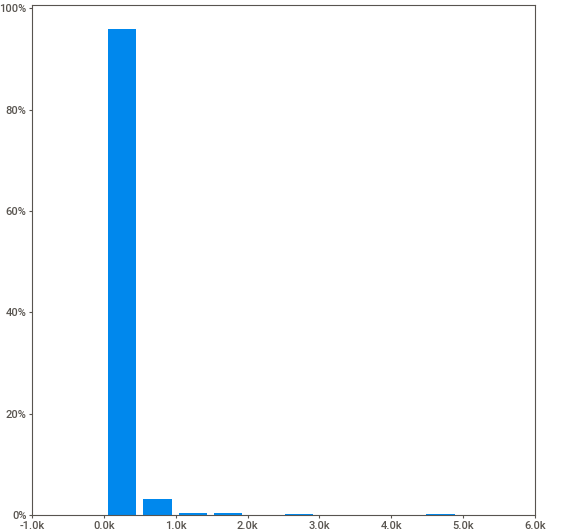
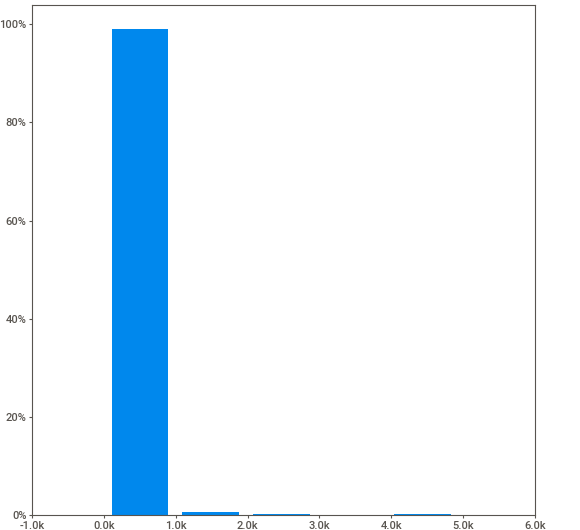
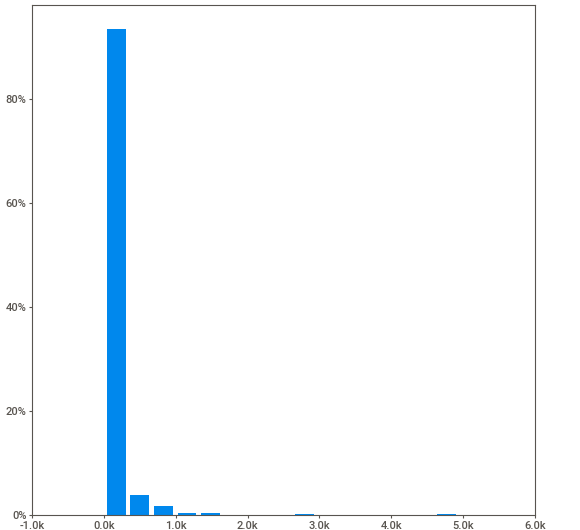
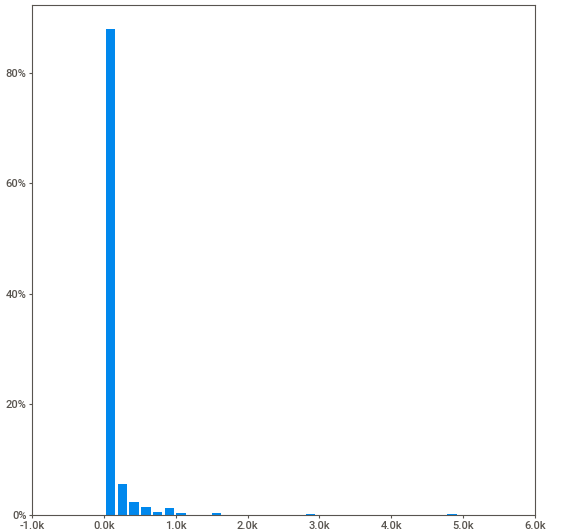
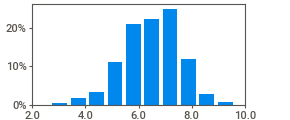
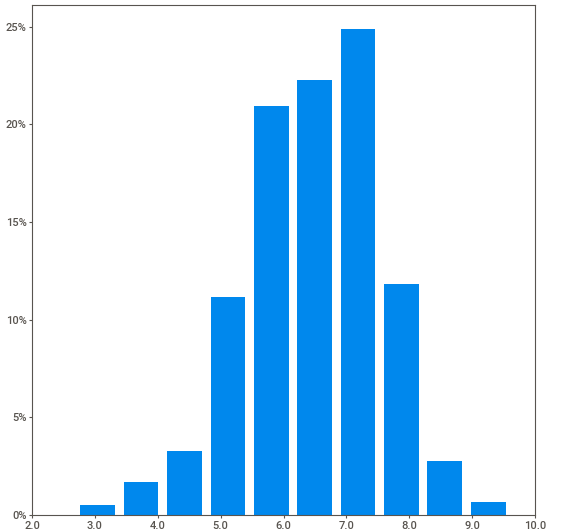
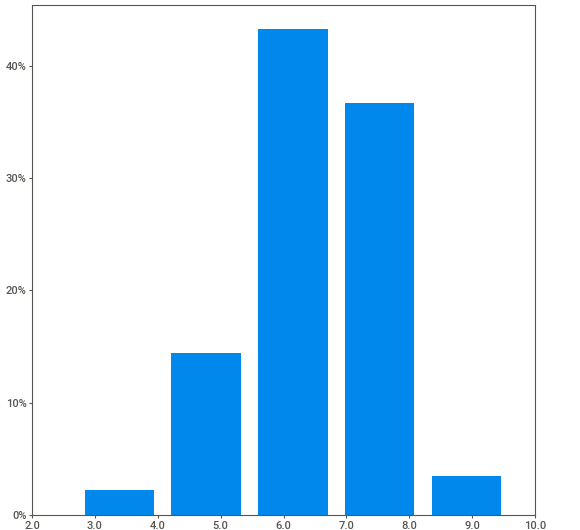
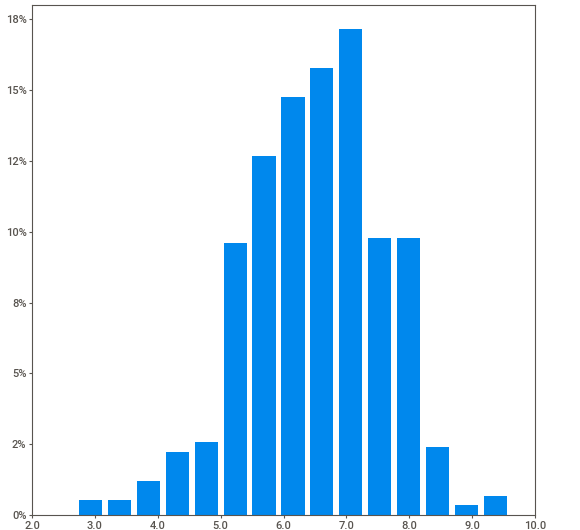
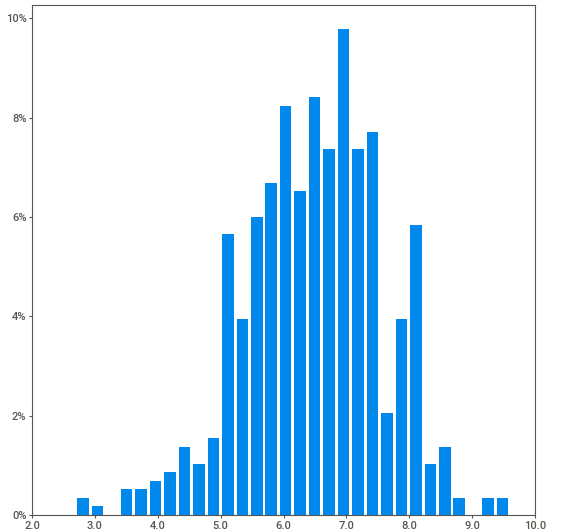
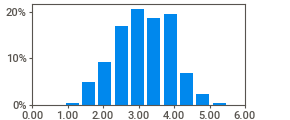
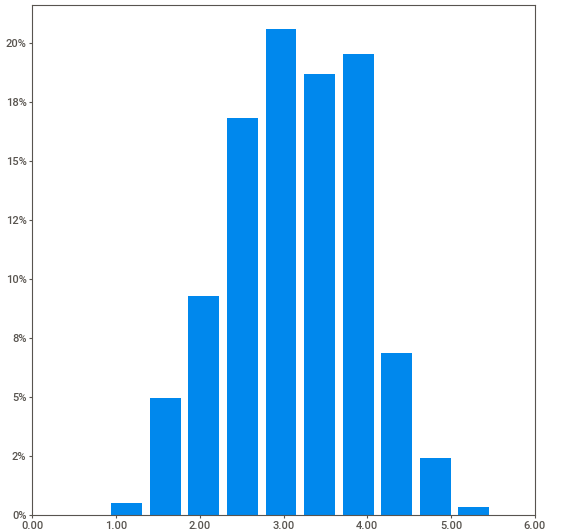
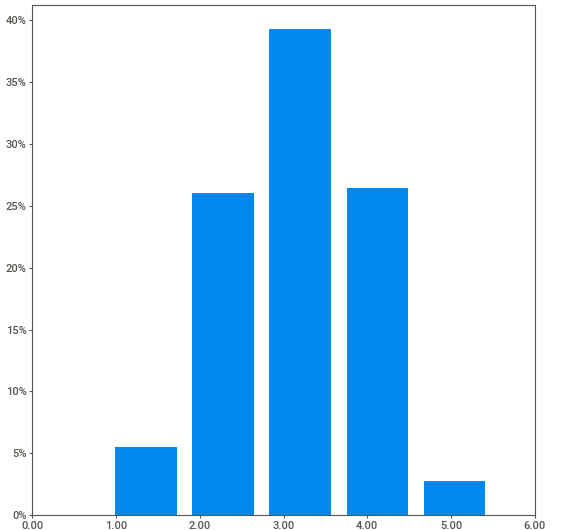
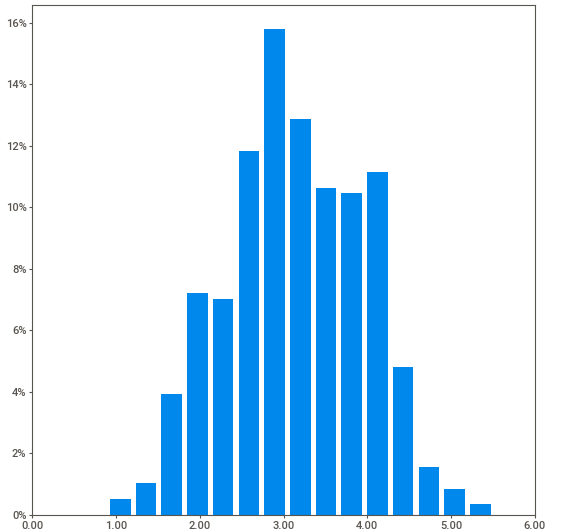
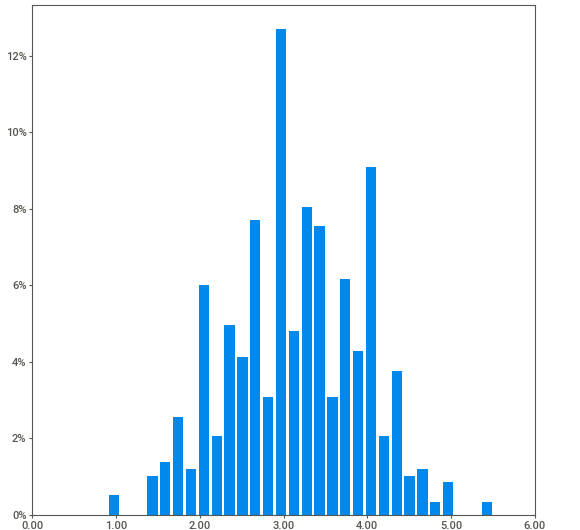
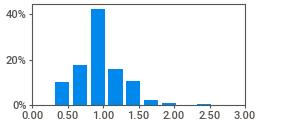
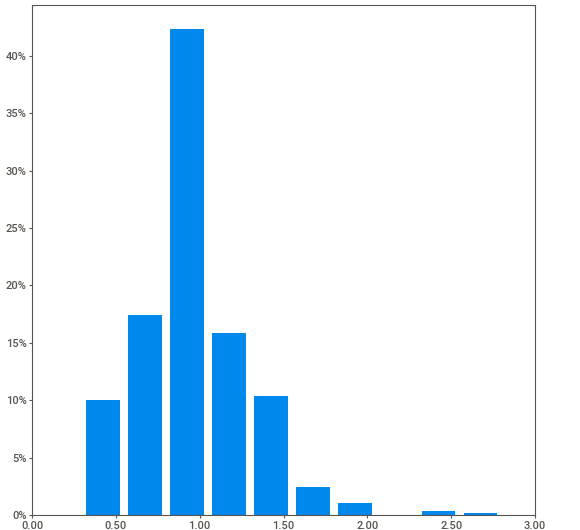
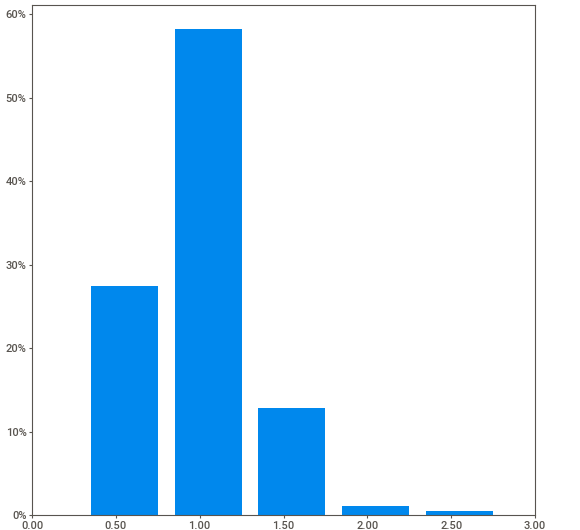
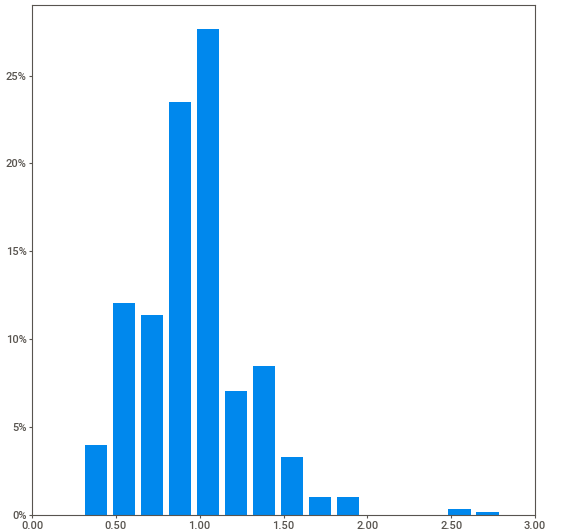
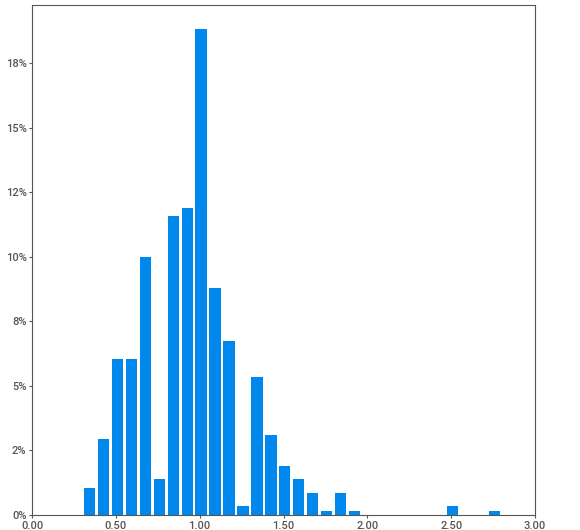
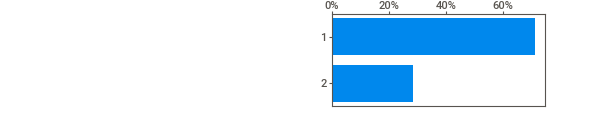
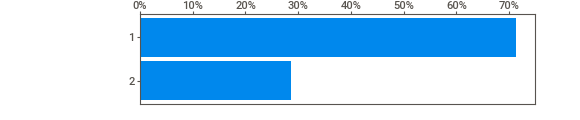
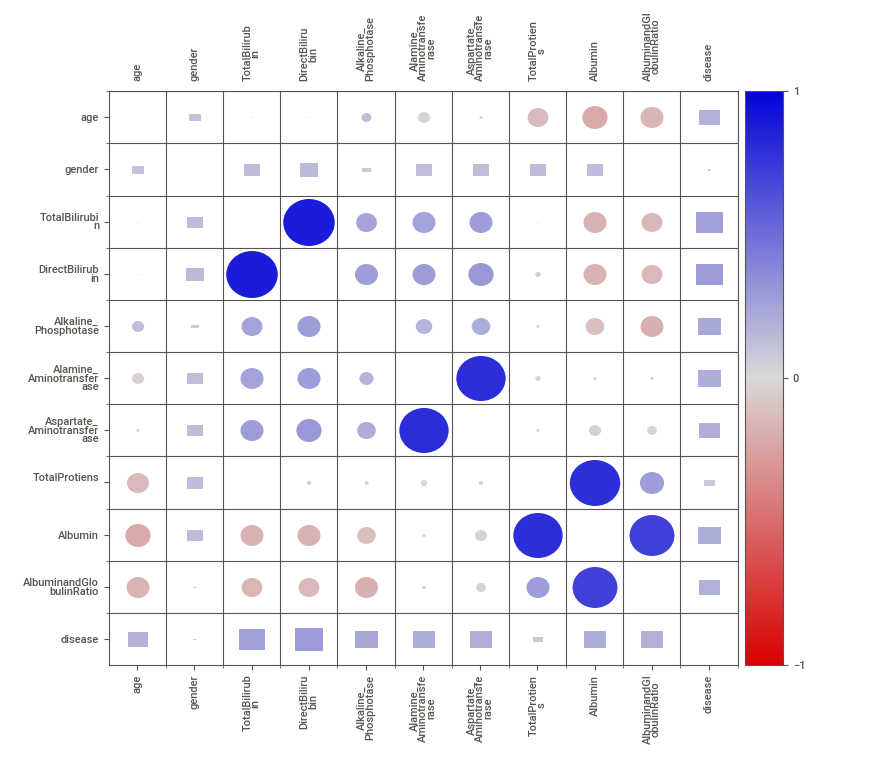
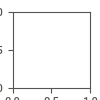

In [11]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_notebook()

## Insight :
1. Most of the patients have age between 35 to 55.
2. Males are more observed in the dataset.
3. Around 90% of people have Total bilirubin below 10.0 and as it is increasing the decrease in the observation can be seen.
4. Around 80% - 82% of patients have DirectBilirubin below 2.5 and as the DirectBilirubin is increaseing we can see gradual decrease in the observation so we can conclude that very few people have DirectBilirubin more than 17.5.
5. We can see gradual decrease in the Alkaline Phosphotase starting from 198 till 2110.
6. The maximum observations for total protiens lies between 5.0 to 8.0.
7. Data is normally spread in the albumin having maximum observation for 3000.
8. Albumin and globulin ratios observation increases from 0.30 till 1.00 and starts decreasing till 3.00.
9. In disease column most of the observation have value 1 which means that most of the patients do not have any liver disease.

## Multivariate analysis :


In [12]:
df.columns

Index(['age', 'gender', 'TotalBilirubin', 'DirectBilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'TotalProtiens', 'Albumin',
       'AlbuminandGlobulinRatio', 'disease'],
      dtype='object')

In [13]:
data1=df[['age', 'gender', 'TotalProtiens', 'Albumin',
       'AlbuminandGlobulinRatio']]

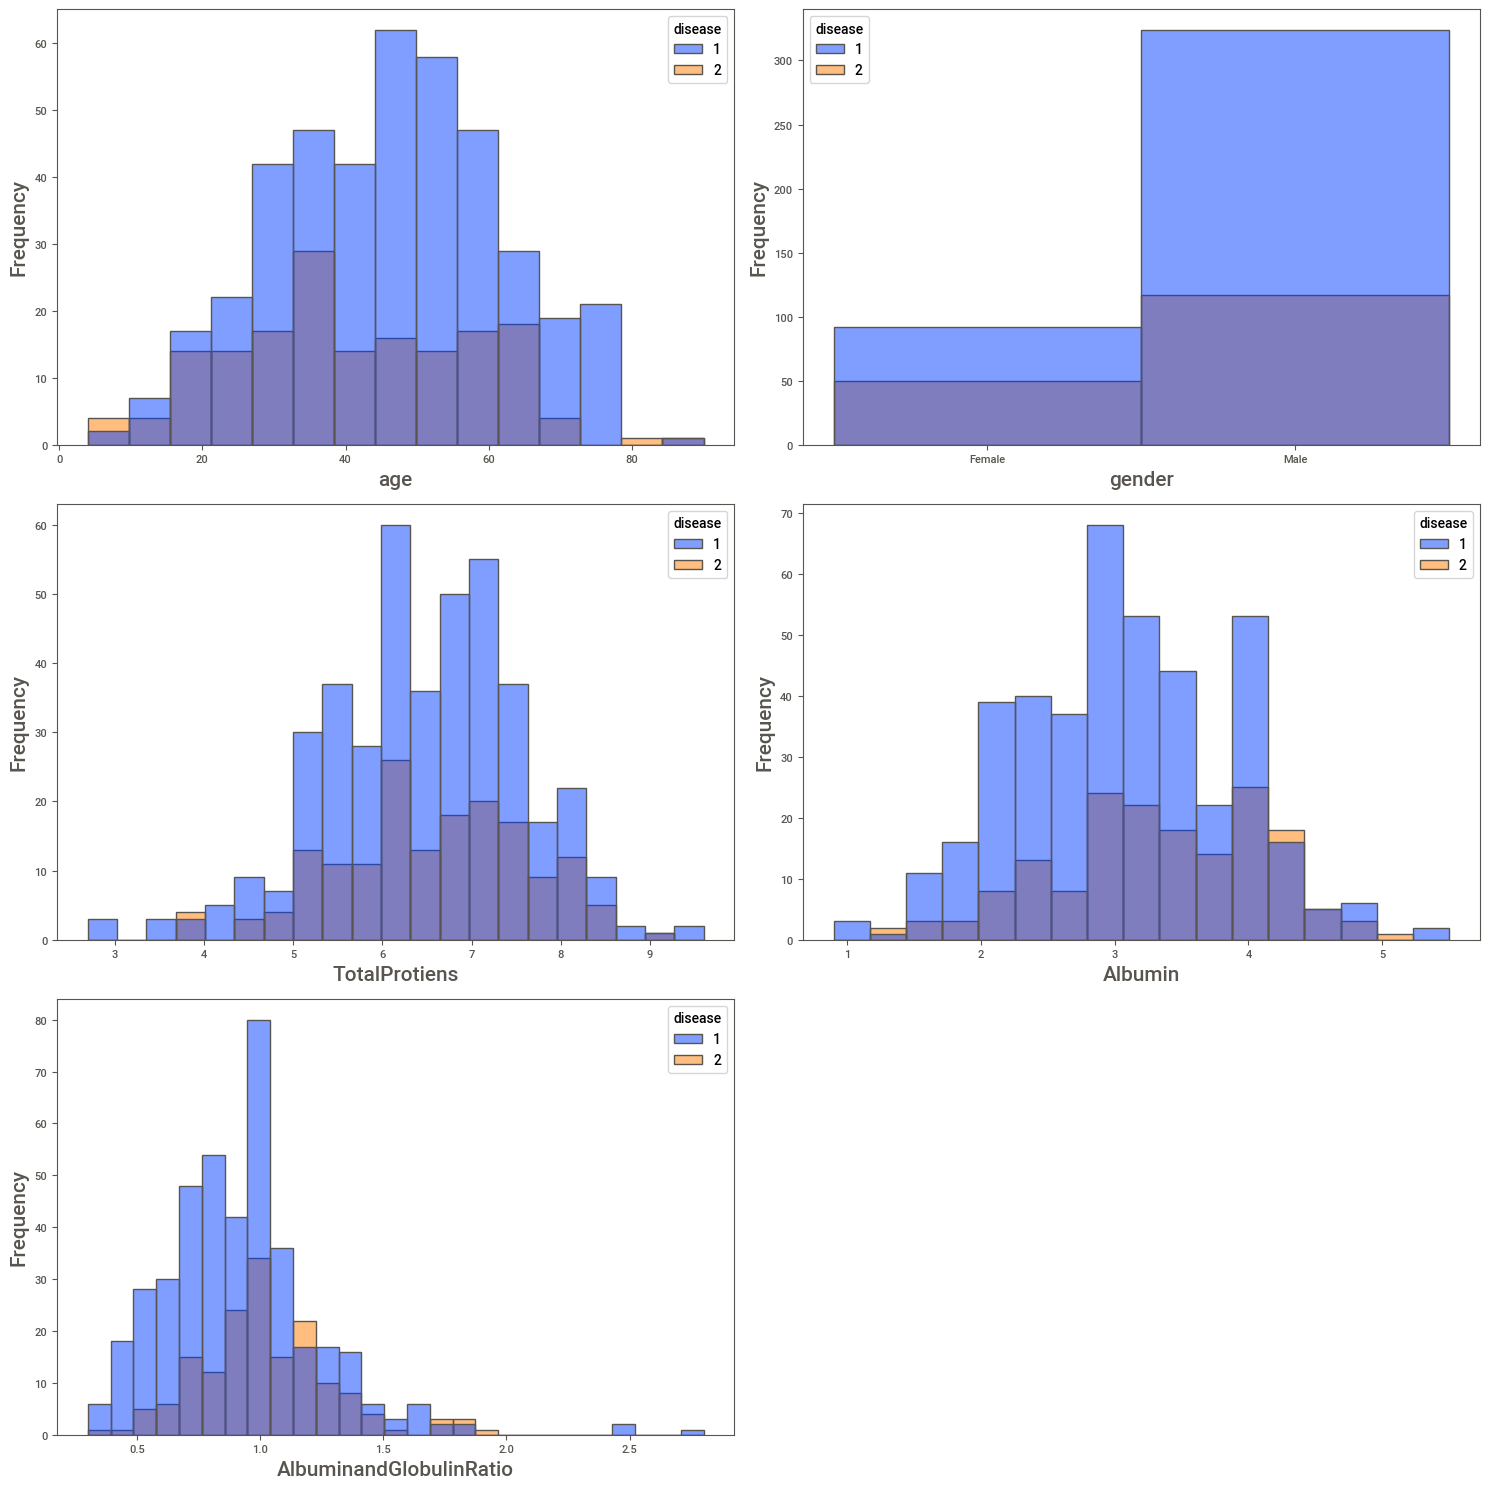

In [14]:
plt.figure(figsize=(15,15), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=6 :
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(x=data1[column],hue=df.disease,palette='bright')
        plt.xlabel(column,fontsize=15)#assign name to x-axis and set font-20
        plt.ylabel('Frequency',fontsize=15)
    plotnumber+=1#counter increment
plt.tight_layout()

# INSIGHTS :


## 1. Age :
* Around 30 patients have liver disease who age 35 .most of the patients 45 to 50.

## 2. Gender:
* We can see that in dataset most of the patients are male and the patient who have more liver disease are males only and the count of them is above 100.

## 3. Totalprotiens :
* Between 6 - 6.5 we can see higher number of liver diseased patients and there is no such direct trend observed for Totalprotiens.

## 4. Albumin :
* We can see gradual increase in liver diseased patients till 3 and rest of the level don't have fix trend, so after Albumin 3 we have seen the increased number of liver diseased patients than lower albumin levels.

## 5. AlbuminandGlobulinRatio :
* We can observe gradual increase in the diseased patients till ratio reaches 1.0, after that we can see that the count of diseased liver patients got decreased.

In [15]:
data2 = df[['TotalBilirubin', 'DirectBilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase']]


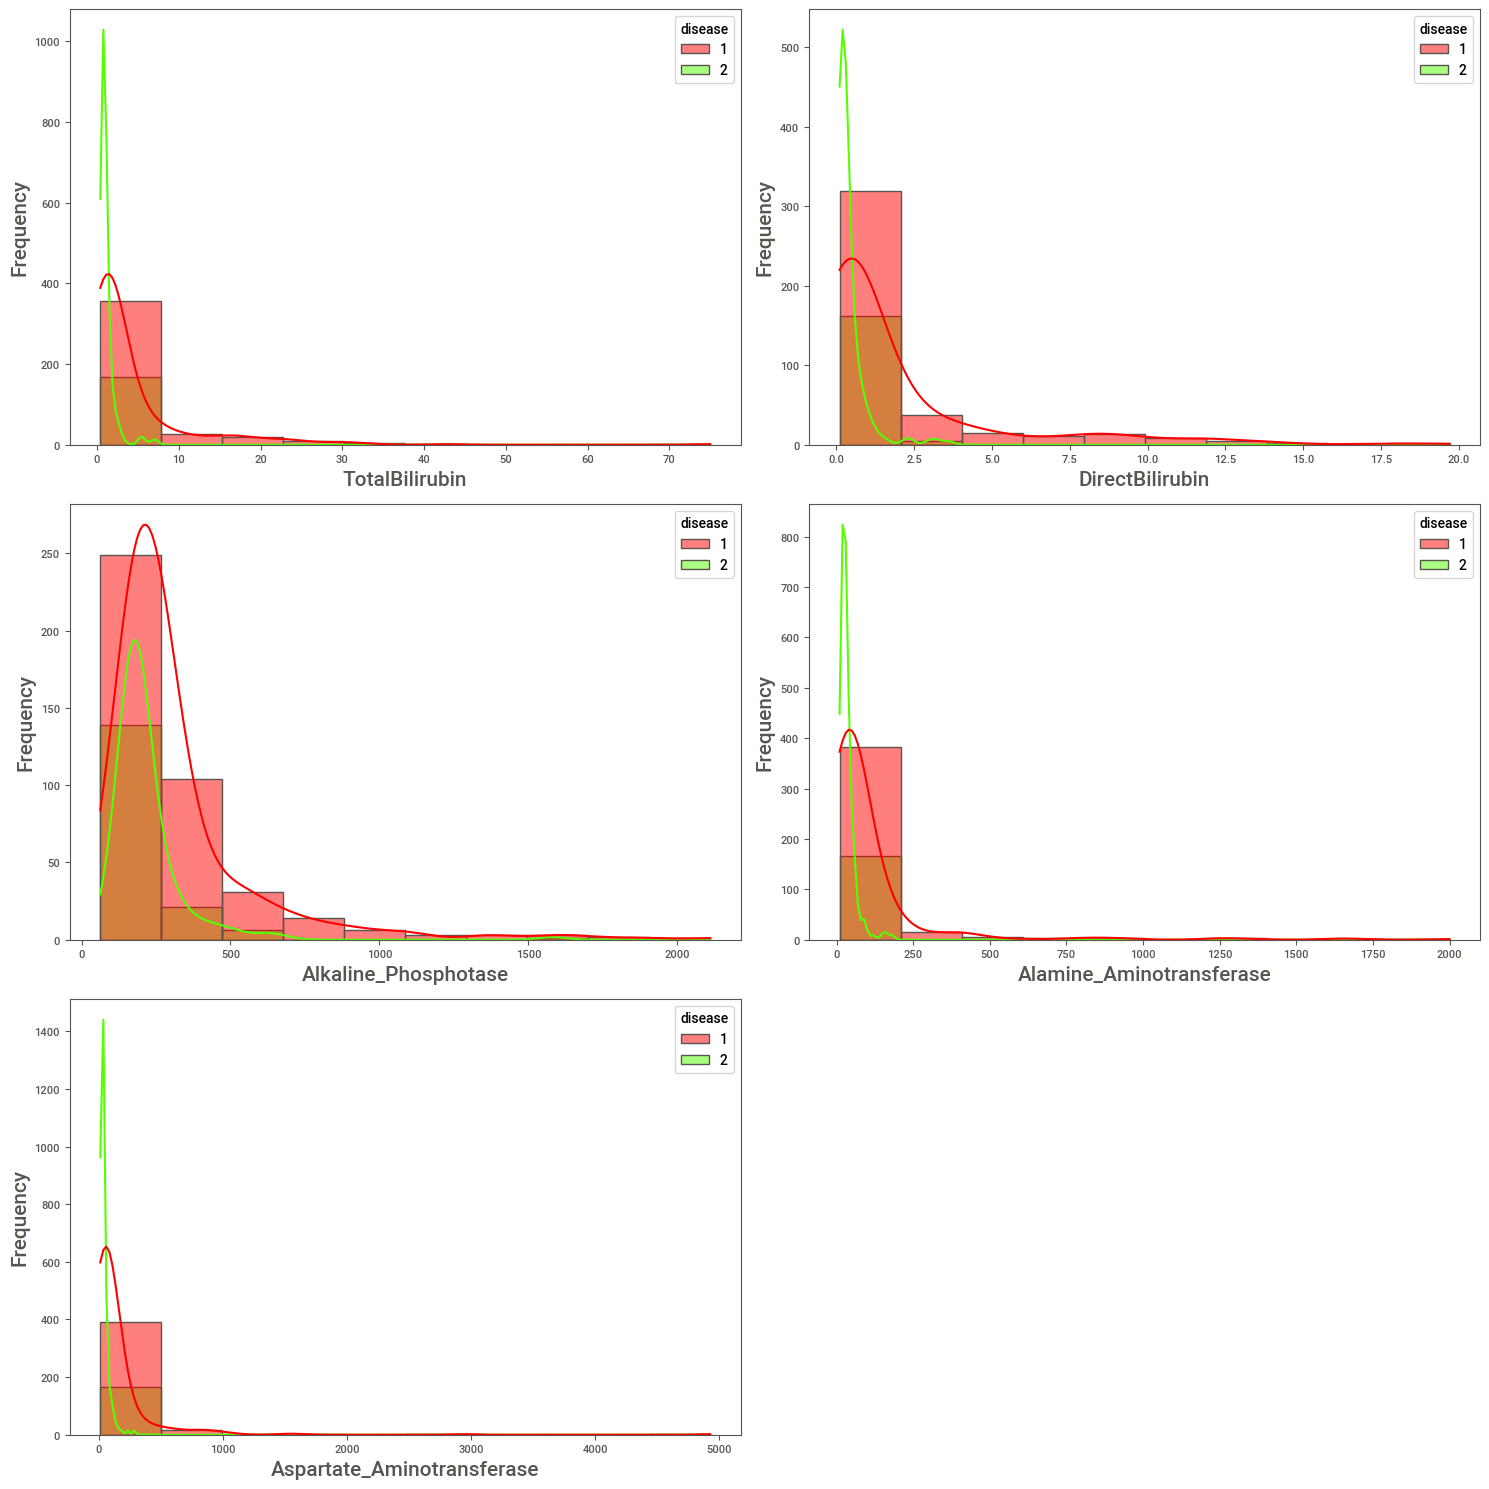

In [16]:
plt.figure(figsize=(15,15), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data2:#accessing the columns 
    if plotnumber<=6 :
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(x=data2[column],hue=df.disease,palette='prism',bins=10,kde=True)
        plt.xlabel(column,fontsize=15)#assign name to x-axis and set font-20
        plt.ylabel('Frequency',fontsize=15)
    plotnumber+=1#counter increment
plt.tight_layout()

## 6. TotalBilirubin :
* As we can see that the low level of Total_Bilirubin results in liver disease and as the Total bilirubin is increasing the number of liver dieseased patients are also decreasing.

## 7. DirectBilirubin :
* Same trend observed as the Total bilirubin. Data looks right skewed here.

## 8. Alkaline_Phosphotase :
* The number of diseased liver patients are comparitively low here . As the level of alkaline_phosphotase is increasing we can see decrease in the number of diseased patients, with this we can conclude that the Alkaline_Phosphotase is inversely proportional to the diseased liver patients.

## 9. Alamine_Aminotransferase :
* It ranges from 0 to 2000, low level of Alkaline_Phosphotase leads to the liver disease this we can conclude from the graph.

## 10. Aspartate_Aminotransferase :
* Same trend is observed as Alamine_Aminotransferase.

#### WE CAN CONCLUDE THAT LOW LEVEL OF THE ABOVE BLOOD CONTENT SIGNIFIES THE HEALTH OF THE LIVER WHICH MAY HAVE MALFUNCTIONING IN THE PATIENTS BODY, ON THE THER HAND NUMBER OF NON DISEASED PATIENTS ARE COMPARITAVELY HIGH.


# DATA PREPROCESSING :

## Handeling Missing Values :

In [17]:
df.isnull().sum()

age                           0
gender                        0
TotalBilirubin                0
DirectBilirubin               0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
TotalProtiens                 0
Albumin                       0
AlbuminandGlobulinRatio       4
disease                       0
dtype: int64

* We can see 1 feature have missing value viz. 'AlbuminandGlobulinRatio'.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   TotalBilirubin              583 non-null    float64
 3   DirectBilirubin             583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   TotalProtiens               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   AlbuminandGlobulinRatio     579 non-null    float64
 10  disease                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [19]:
df.AlbuminandGlobulinRatio=df.AlbuminandGlobulinRatio.fillna(df.AlbuminandGlobulinRatio.median())

In [20]:
df.isnull().sum()

age                           0
gender                        0
TotalBilirubin                0
DirectBilirubin               0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
TotalProtiens                 0
Albumin                       0
AlbuminandGlobulinRatio       0
disease                       0
dtype: int64

* We have no null values so, now we can proceed for further data manipulation.

## Handeling categorical feature:


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   TotalBilirubin              583 non-null    float64
 3   DirectBilirubin             583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   TotalProtiens               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   AlbuminandGlobulinRatio     583 non-null    float64
 10  disease                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


* We have gender feature as categorical data which we will be handeling.

In [22]:
df.gender.value_counts()

Male      441
Female    142
Name: gender, dtype: int64

In [23]:
# We are using manual encoding for this categorical feature.
df.loc[df['gender']=='Female','gender'] = 0 
df.loc[df['gender']=='Male','gender'] = 1
# we took male as 1 bcz. it is more dominant in the dataset in count.

In [24]:
# Rechecking.
df.gender.value_counts()

1    441
0    142
Name: gender, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   TotalBilirubin              583 non-null    float64
 3   DirectBilirubin             583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   TotalProtiens               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   AlbuminandGlobulinRatio     583 non-null    float64
 10  disease                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


* Here we can see that the datatype for gender is still object so we will be changing the datatype of the gender column.

In [26]:
# changing datatype of gender.
df['gender']=df['gender'].astype('float64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    float64
 2   TotalBilirubin              583 non-null    float64
 3   DirectBilirubin             583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   TotalProtiens               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   AlbuminandGlobulinRatio     583 non-null    float64
 10  disease                     583 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 50.2 KB


* Now we can see the datatype of gender has successfully changed into float64.

#### As we have all the features in the numerical form we will be looking for an Outlier and handel it.

## Handeling an Outlier :


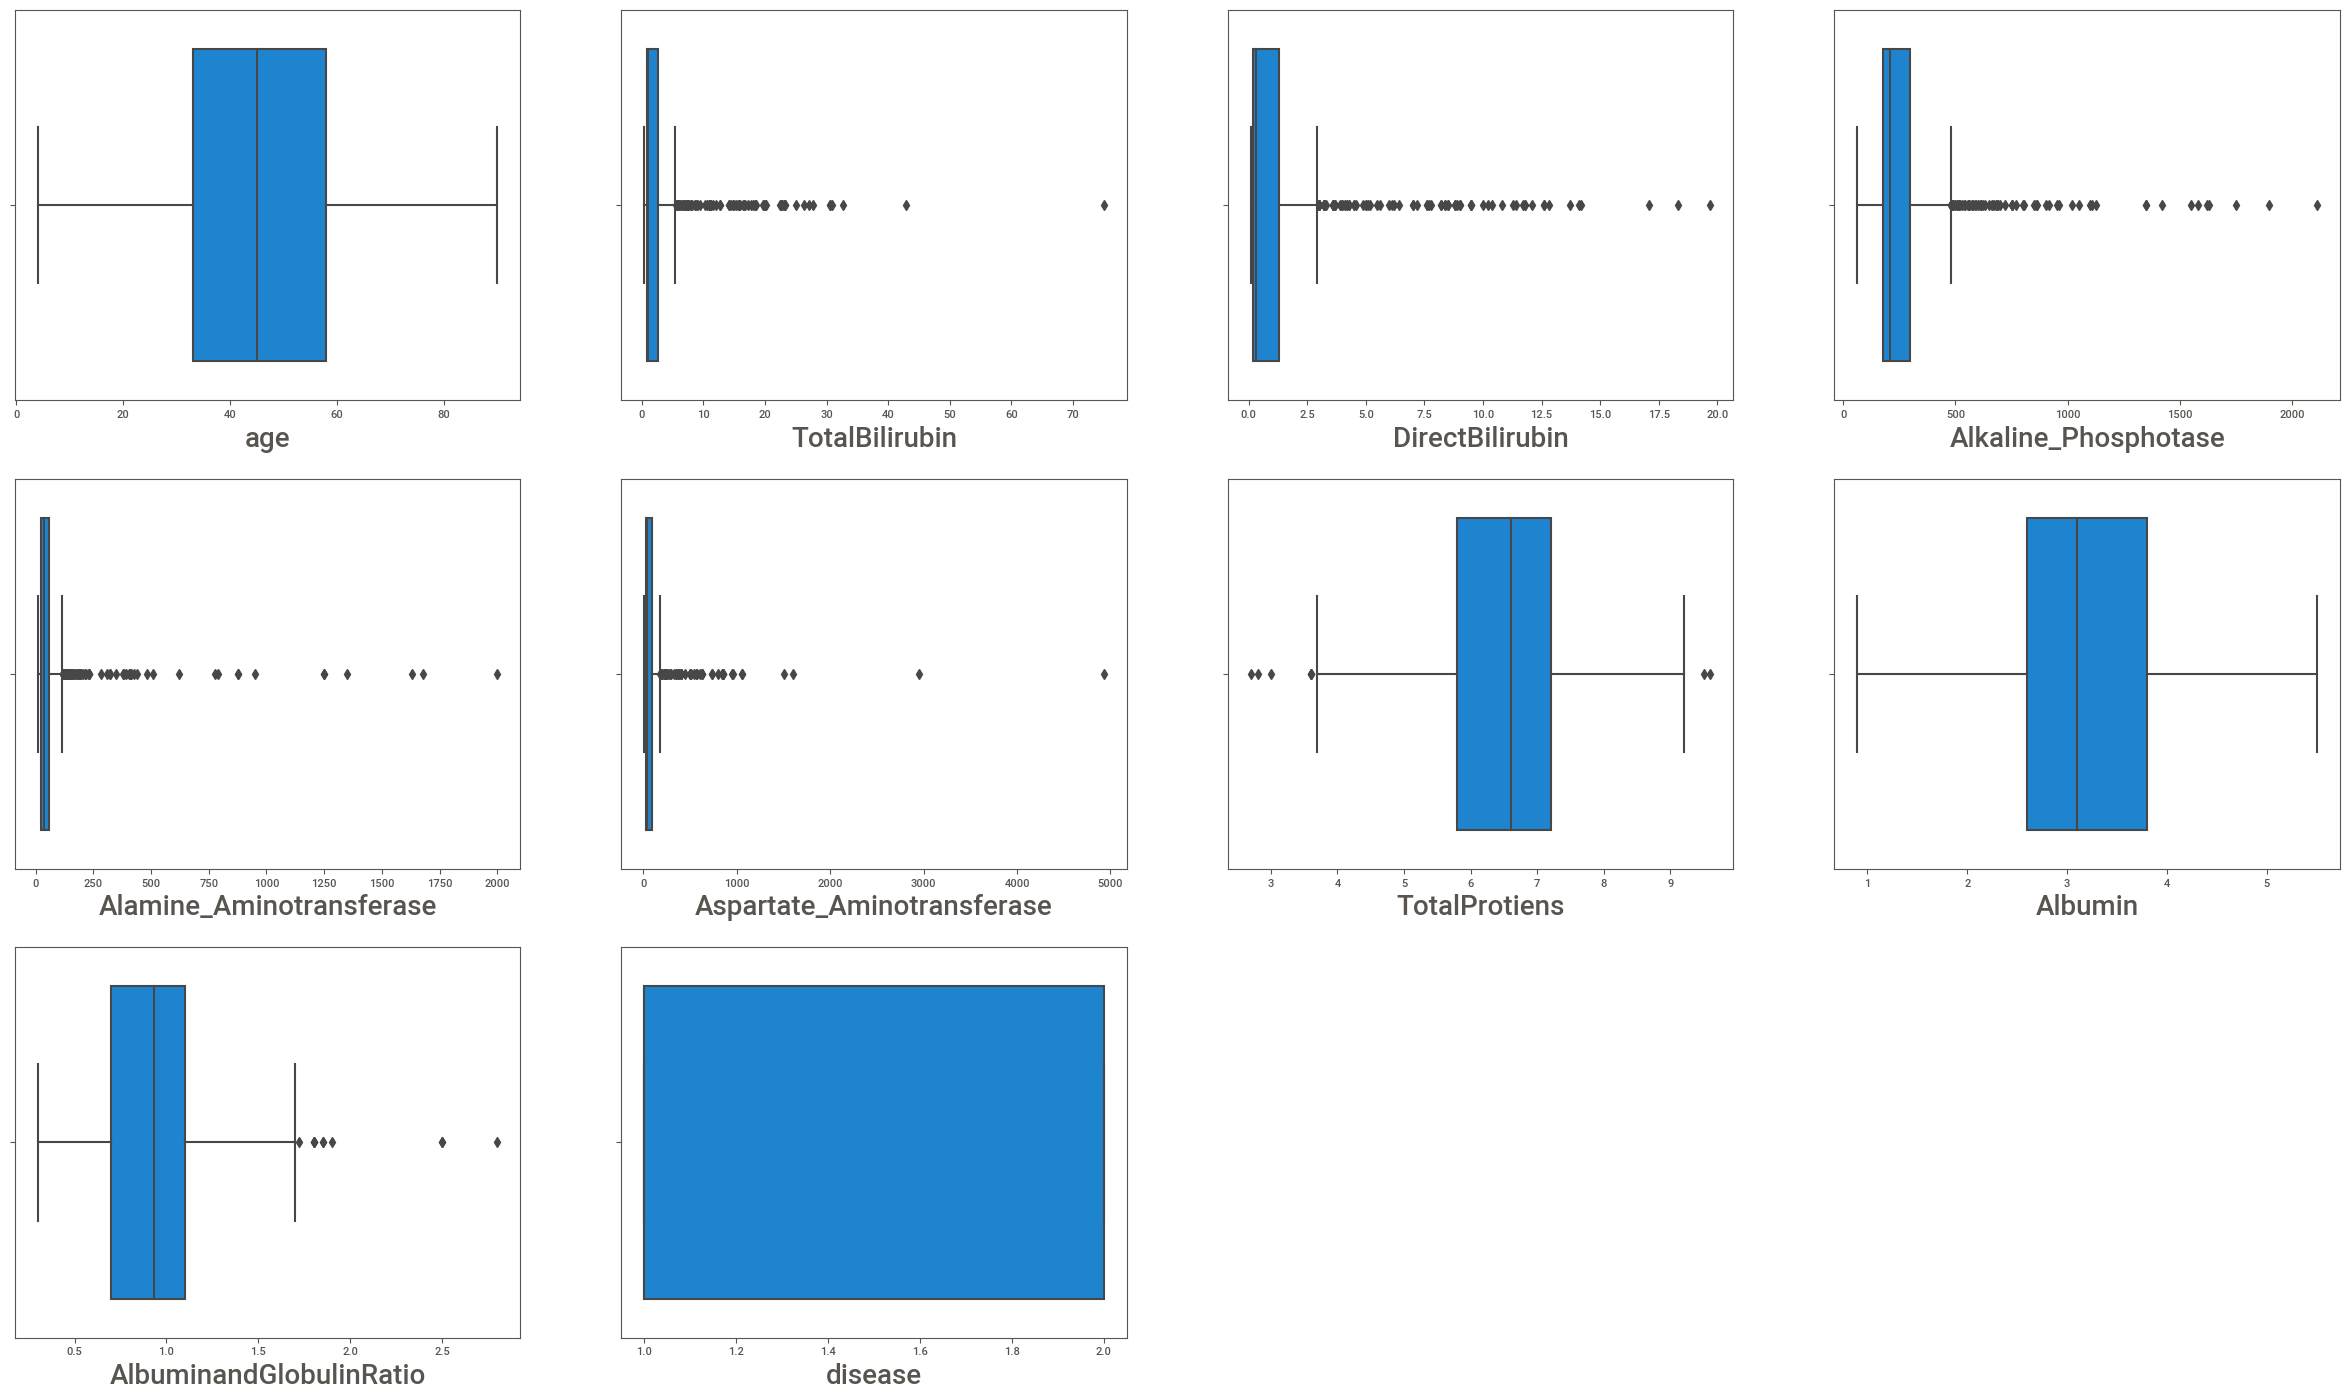

In [28]:
# Checking for an outlier :
box=df[['age', 'TotalBilirubin', 'DirectBilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'TotalProtiens', 'Albumin',
       'AlbuminandGlobulinRatio', 'disease']]
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1#counter

for column in box:#acc
    if plotnumber<=20: 
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

* As we can see here the IQR range for most of the features is very small bcz of that we are seeing the most of the data outside the IQR range, Most important point to consider here is that we only treat the outlier if they are around 5 to 10% of the data but here we can see that, most of the features are excedding that particular limit of the Outliers.
* So we will be handeling only those Outliers which are below the desired range.
* These are present in the Totalprotienes and AlbuminandGlobulinRatio.

## Handeling an Outlier for TotalProtiens :


In [29]:
# Importing Library:
from scipy import stats as st

In [30]:
IQR = st.iqr(df.TotalProtiens, interpolation = 'midpoint') #calculating Inter quantile range

IQR

1.4000000000000004

In [31]:
Q1=df.TotalProtiens.quantile(0.25)#defining 25% of data
Q3=df.TotalProtiens.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR#setting minimum limit


max_limit=Q3 + 1.5*IQR#setting maximum limit

print(min_limit,max_limit)

3.6999999999999993 9.3


In [32]:
df.loc[df['TotalProtiens']<min_limit,'TotalProtiens']=np.median(df['TotalProtiens'])

In [33]:
df.loc[df['TotalProtiens']>max_limit,'TotalProtiens']=np.median(df['TotalProtiens'])

<AxesSubplot:xlabel='TotalProtiens'>

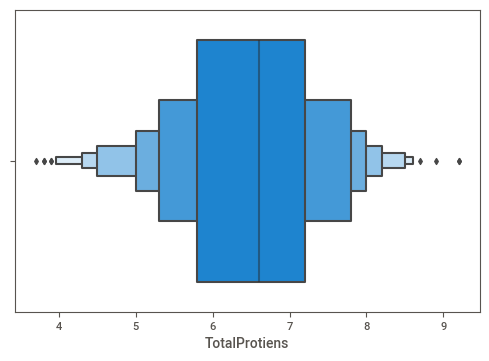

In [34]:
sns.boxenplot('TotalProtiens',data=df)

## Handeling Outlier for AlbuminandGlobulinRatio  :

In [35]:
IQR = st.iqr(df.AlbuminandGlobulinRatio, interpolation = 'midpoint') #calculating Inter quantile range

IQR

0.40000000000000013

In [36]:
Q1=df.AlbuminandGlobulinRatio.quantile(0.25)#defining 25% of data
Q3=df.AlbuminandGlobulinRatio.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR#setting minimum limit


max_limit=Q3 + 1.5*IQR#setting maximum limit

print(min_limit,max_limit)

0.09999999999999976 1.7000000000000002


In [37]:
df.loc[df['AlbuminandGlobulinRatio']>max_limit,'AlbuminandGlobulinRatio']=np.median(df['AlbuminandGlobulinRatio'])

<AxesSubplot:xlabel='AlbuminandGlobulinRatio'>

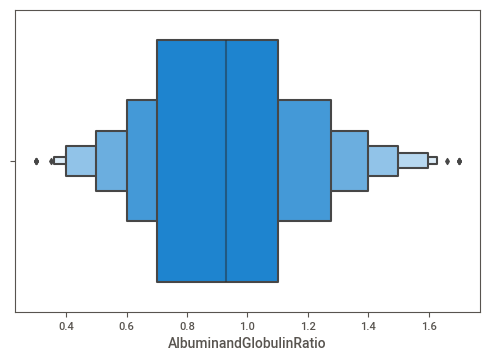

In [38]:
sns.boxenplot('AlbuminandGlobulinRatio',data=df)

## Feature Selection :


In [39]:
df.corr()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.174480,-0.265924,-0.233368,-0.137351
gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.093144,-0.093799,-0.005399,-0.082416
TotalBilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008508,-0.222250,-0.291015,-0.220208
DirectBilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000599,-0.228531,-0.303058,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.031066,-0.165453,-0.249644,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.038942,-0.029742,0.012516,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.024014,-0.085290,-0.076539,-0.151934
TotalProtiens,-0.174480,-0.093144,-0.008508,-0.000599,-0.031066,-0.038942,-0.024014,1.000000,0.741916,0.239161,0.021968
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.741916,1.000000,0.751601,0.161388
AlbuminandGlobulinRatio,-0.233368,-0.005399,-0.291015,-0.303058,-0.249644,0.012516,-0.076539,0.239161,0.751601,1.000000,0.178866


<AxesSubplot:>

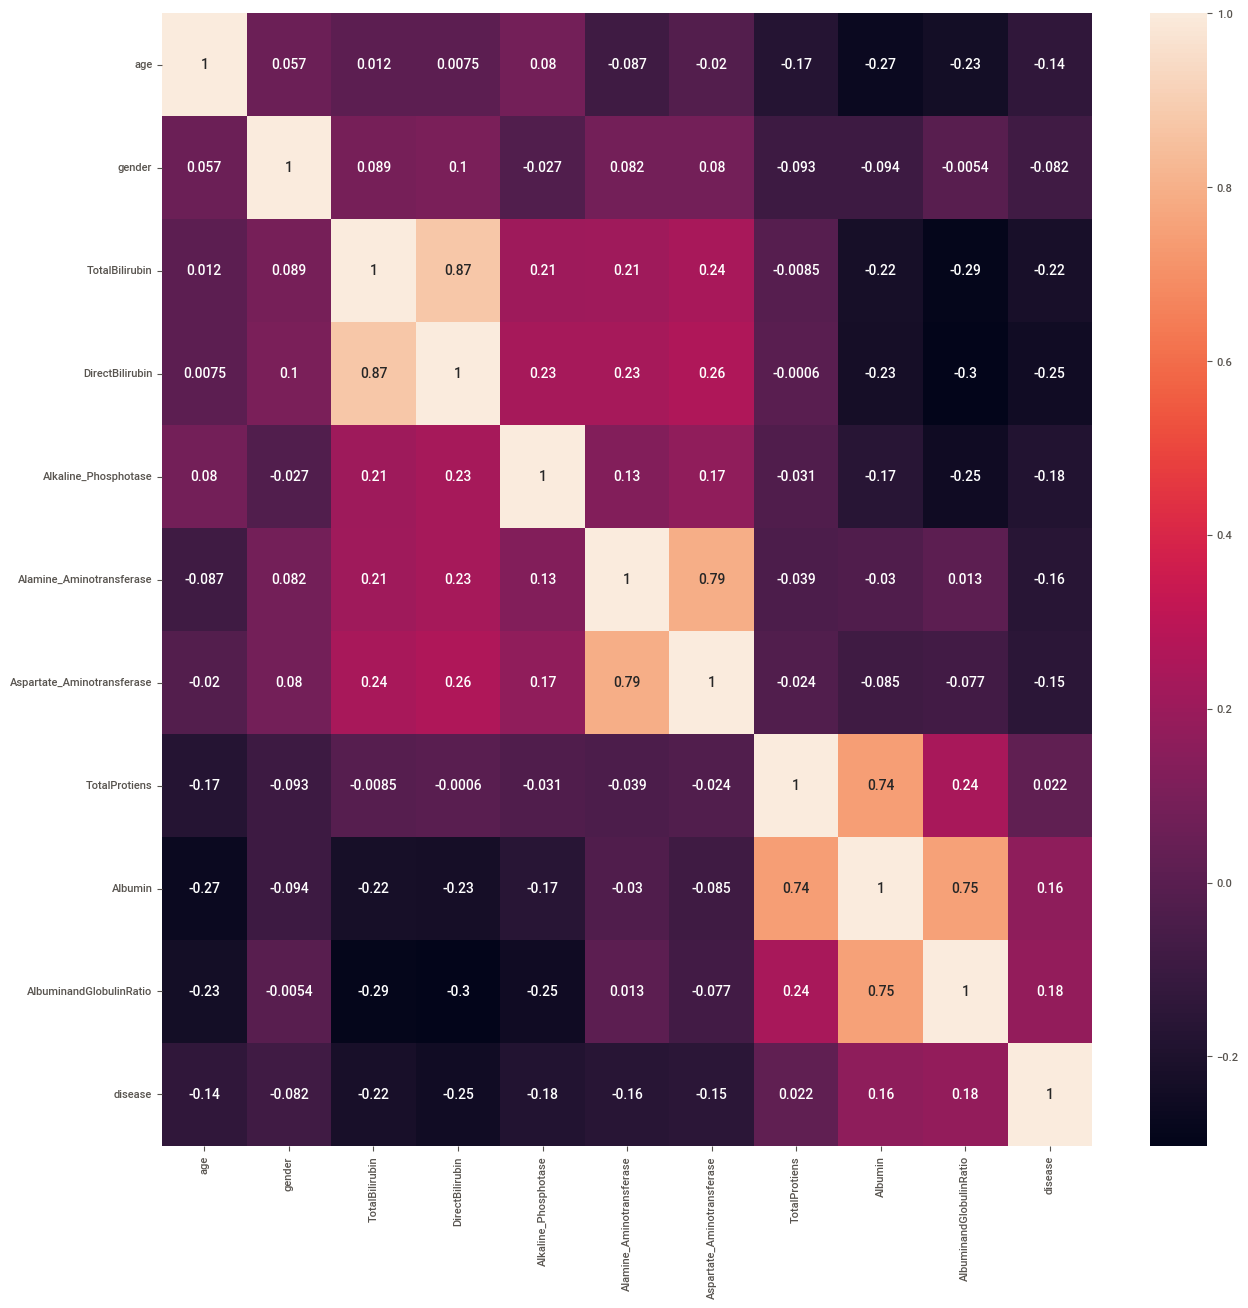

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [41]:
# creating DataFrame of correlated features:
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat>=0.9]
corrmat = corrmat[corrmat<1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


* We can see above no correlated features are available here.

In [42]:
df.tail()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
578,60,1.0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1.0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1.0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1.0,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1.0,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [43]:
df.to_csv('Data_prepr.csv')

# Model Building :

## 1. LOGISTIC REGRESSION:

In [44]:
# Importing dataset.
df=pd.read_csv('Data_prepr.csv')
df.head()

,Unnamed: 0,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
0,0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [45]:
# CREATION OF X AND y.
from sklearn.model_selection import train_test_split
X = df.drop(['disease','Unnamed: 0'],axis=1)
y = df['disease']


In [46]:
X.head()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [47]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      2
9      1
10     1
11     1
12     2
13     1
14     1
15     2
16     1
17     2
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     1
26     1
27     1
28     2
29     2
30     1
31     1
32     2
33     2
34     2
35     1
36     2
37     1
38     1
39     1
40     1
41     2
42     2
43     1
44     2
45     2
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     2
57     2
58     1
59     2
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     2
70     1
71     1
72     1
73     1
74     1
75     2
76     1
77     1
78     2
79     1
80     1
81     1
82     2
83     1
84     1
85     1
86     2
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    2
101    2
102    1
103    2
104    1
105    2
106    2
107    2
108    2
109    2
110    2
1

In [48]:
# Model creation.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [49]:
# splitting train and test data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=50)

In [50]:
# model creation.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [51]:
# Making prediction
y_pred = log_reg.predict(x_test)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [53]:
# Calculating The Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [54]:
# Checking test accuracy.
test_accuracy = accuracy_score(y_test,y_pred)
test_accuracy

0.6986301369863014

In [55]:
# Precision Testing
Precision = precision_score(y_test,y_pred)
Precision

0.7244094488188977

In [56]:
# Checking recall.
recall = recall_score(y_test,y_pred)
recall

0.9108910891089109

In [57]:
# checking f1_score.
f1_score = f1_score(y_test,y_pred)
f1_score

0.8070175438596492

In [58]:
report=classification_report(y_test, y_pred)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           1       0.72      0.91      0.81       101
           2       0.53      0.22      0.31        45

    accuracy                           0.70       146
   macro avg       0.63      0.57      0.56       146
weighted avg       0.66      0.70      0.65       146



In [59]:
# Checking confusion matrix.
cros=pd.crosstab(y_test,y_pred)
cros

col_0,1,2
disease,,
1,92,9
2,35,10


### INSIGHT :
* From above classification report we can see that the recall for class 1 is 91% and class 2 is 22%.
* But the data was imbalanced.
* So we will be performing the SMOTE (Synthetic Minority Over-Sampling Technique)


In [60]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_sm,y_sm=sm.fit_resample(X,y)
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_sm))

Actual Classes Counter({1: 416, 2: 167})
SMOTE Classes Counter({1: 416, 2: 416})


In [61]:
# Applying the SMOTE To Balance the df

from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Applying SMOTE on training data.
x_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'),
                                                  y_train)

In [62]:
 y_train_smote.value_counts()

1    315
2    315
Name: disease, dtype: int64

In [63]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [64]:
y_pred_smote = log_reg.predict(x_test)

In [65]:
y_pred_smote

array([2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1], dtype=int64)

In [66]:
# Calculating The Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [67]:
test_accuracy = accuracy_score(y_test,y_pred_smote)
test_accuracy

0.684931506849315

In [68]:
# Precision Testing
Precision = precision_score(y_test,y_pred_smote)
Precision

0.9104477611940298

In [69]:
recall = recall_score(y_test,y_pred_smote)
recall

0.6039603960396039

In [70]:
f1_score = f1_score(y_test,y_pred_smote)
f1_score

0.7261904761904763

In [71]:
report=classification_report(y_test, y_pred_smote)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           1       0.91      0.60      0.73       101
           2       0.49      0.87      0.63        45

    accuracy                           0.68       146
   macro avg       0.70      0.74      0.68       146
weighted avg       0.78      0.68      0.70       146



In [72]:
cross=pd.crosstab(y_test,y_pred_smote)
cross

col_0,1,2
disease,,
1,61,40
2,6,39


### CONCLUSION [LOGISTIC REGRESSION] :

* In the case of the medical usecase we always consider the Recall as our evaluation metrics.
* Recall gives us the fraction of positives that were correctly identified.
* Here False Negative should be as low as possible. 
* Here we are getting recall of 63% for class 1 and 84% for class 2.
* We can conlcude that the model is not performing that great so we'll be trying out another algorithm.

## 2. SVM Classifier :

In [73]:
# IMPORTING DATASET :
df=pd.read_csv('Data_prepr.csv')
df.head()

,Unnamed: 0,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
0,0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [74]:
X = df.drop(['Unnamed: 0','disease'],axis=1)
y = df.disease

In [75]:
X.head()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [76]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: disease, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.25,random_state=42)

In [78]:
y.shape

(583,)

In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [80]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [81]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print("Actual Classes",Counter(y
))
print("SMOTE Classes",Counter(y_sm))

Actual Classes Counter({1: 416, 2: 167})
SMOTE Classes Counter({1: 416, 2: 416})


In [82]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [83]:
y_hat=svclassifier.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.5616438356164384

In [85]:
y_hat_training=svclassifier.predict(X_train)

### Training performance:

In [86]:
print(classification_report(y_train,y_hat_training))

              precision    recall  f1-score   support

           1       0.89      0.48      0.62       307
           2       0.41      0.85      0.55       130

    accuracy                           0.59       437
   macro avg       0.65      0.67      0.59       437
weighted avg       0.74      0.59      0.60       437



### Testing performance:

In [87]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.89      0.47      0.61       109
           2       0.35      0.84      0.49        37

    accuracy                           0.56       146
   macro avg       0.62      0.65      0.55       146
weighted avg       0.76      0.56      0.58       146



### Insight :
* This algorithm is not performing well on training as well as testing side.
* The recall observed low for class 1 in training and testing.
* So we will tune the hyperparameter of SVM classifier.

In [88]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,1,2
disease,,
1,51,58
2,6,31


In [89]:
f1=f1_score(y_test,y_hat)
f1

0.6144578313253013

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.83233533 0.83483483 0.8313253 ]
Cross validation Score: 0.8328318217936572
Std : 0.0014751463523947272


## Hyperparameter tuning of SVM Classifier :


In [91]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.

[CV] END ......................C=5, gamma=1, random_state=10; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END .................C=5, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C

[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=1

[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=

[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=

[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=19; total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [92]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'random_state': 1}


In [93]:
clf=SVC(C=0.1, gamma=1,random_state=1)

In [94]:
clf.fit(X_smote, y_smote)

SVC(C=0.1, gamma=1, random_state=1)

In [95]:
y_clf=clf.predict(X_test)

In [96]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,1,2
disease,,
1,109,0
2,36,1


In [97]:
f1=f1_score(y_test,y_clf)
f1

0.858267716535433

In [98]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())

[0.83233533 0.83483483 0.8313253 ]
Cross validation Score: 0.8328318217936572
Std : 0.0014751463523947272


In [99]:
report=classification_report(y_test, y_clf)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           1       0.75      1.00      0.86       109
           2       1.00      0.03      0.05        37

    accuracy                           0.75       146
   macro avg       0.88      0.51      0.46       146
weighted avg       0.81      0.75      0.65       146



* As the model performance is not good we will try using Decision Tree Classifier.

## 3. KNN_CLASSIFIER :

In [100]:
df = pd.read_csv('Data_prepr.csv')
df.head()

,Unnamed: 0,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
0,0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [101]:
# CREATING X and y.
X=df.drop(['disease','Unnamed: 0'],axis=1)
y=df['disease']

In [102]:
X.head()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [103]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: disease, dtype: int64

In [104]:
#balancing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_SM,y_SM=sm.fit_resample(X,y)
print(Counter(y_SM))

Counter({1: 416, 2: 167})
Counter({1: 416, 2: 416})


In [105]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_SM))

Actual Classes Counter({1: 416, 2: 167})
SMOTE Classes Counter({1: 416, 2: 416})


In [106]:
# Model creation.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [107]:
# splitting train and test data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=50)

In [108]:
# model creation.
from sklearn.neighbors import KNeighborsClassifier # for classification task
knn =  KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [109]:
# Making prediction
y_pred = knn.predict(x_test)

In [110]:
y_pred

array([1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [111]:
# Calculating The Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [112]:
# Checking test accuracy.
test_accuracy = accuracy_score(y_test,y_pred)
test_accuracy

0.6712328767123288

In [113]:
# Precision Testing
Precision = precision_score(y_test,y_pred)
Precision

0.7226890756302521

In [114]:
# Checking recall.
recall = recall_score(y_test,y_pred)
recall

0.8514851485148515

In [115]:
# checking f1_score.
f1_score = f1_score(y_test,y_pred)
f1_score

0.7818181818181817

In [116]:
report=classification_report(y_test, y_pred)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           1       0.72      0.85      0.78       101
           2       0.44      0.27      0.33        45

    accuracy                           0.67       146
   macro avg       0.58      0.56      0.56       146
weighted avg       0.64      0.67      0.64       146



In [117]:
# Checking confusion matrix.
cros=pd.crosstab(y_test,y_pred)
cros

col_0,1,2
disease,,
1,86,15
2,33,12


### CONCLUSION [KNNClassifier] :
* Here we can see that the recall for class 2 is 27% and for class 1 is 85%.
* We can say that the model is little bit biased towards class 1.
* This model is also not performing that well.

## 4. DECISION TREE CLASSIFIER :

In [118]:
df=pd.read_csv('Data_prepr.csv')
df.head()

,Unnamed: 0,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
0,0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [119]:
# CREATING X and y.
X = df.drop(['Unnamed: 0','disease'],axis=1)
y = df.disease

In [120]:
X.head()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [121]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: disease, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.25,random_state=42)

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score,classification_report,f1_score #here f1 score is important
## Training score
train_predict=dt.predict(X_train)
cc_train=accuracy_score(y_train,train_predict)
cc_train

1.0

* It is working well on training side

In [125]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       130

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



In [126]:
cc_test=accuracy_score(y_test,y_hat)
cc_test

0.678082191780822

In [127]:
cmm=pd.crosstab(y_test,y_hat)
cmm

col_0,1,2
disease,,
1,76,33
2,14,23


In [128]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.84      0.70      0.76       109
           2       0.41      0.62      0.49        37

    accuracy                           0.68       146
   macro avg       0.63      0.66      0.63       146
weighted avg       0.73      0.68      0.70       146



* It is not working that well on the testing side due to overfitting.
* So we will tune the Hyperparameter for the model and then will check the performance of the model.

## Hyperparameter Tuning for Decision tree :

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,f1_score 

In [130]:
# APPLYING GRIDSEARCHCV.
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=5)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")



Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [131]:
tree_cv.best_score_

0.8252612612612614

In [132]:
dt1=DecisionTreeClassifier(criterion='gini',
                           max_depth=12,min_samples_leaf=2,
                           min_samples_split=2,splitter='random')
dt1

DecisionTreeClassifier(max_depth=12, min_samples_leaf=2, splitter='random')

In [133]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=2, splitter='random')

In [134]:
y_hat1=dt1.predict(X_test)

In [135]:
test_accuracy=accuracy_score(y_test,y_hat1)
test_accuracy

0.636986301369863

In [136]:
test_f1=f1_score(y_test,y_hat1)
test_f1

0.7414634146341462

In [137]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           1       0.79      0.70      0.74       109
           2       0.34      0.46      0.39        37

    accuracy                           0.64       146
   macro avg       0.57      0.58      0.57       146
weighted avg       0.68      0.64      0.65       146



In [138]:
CM=pd.crosstab(y_test,y_hat1)
CM

col_0,1,2
disease,,
1,76,33
2,20,17


### CONCLUSION [DECISION TREE CLASSIFIER] :

* Here we can observe that the recall score for class 2 is 30% only from that we can conclude that the model is not performing well.
* So we will try next algorithm viz. XGBoost Classifier.

## 5. XGBoost Classifier :

In [139]:
dff=pd.read_csv('Data_prepr.csv')
dff.head()

,Unnamed: 0,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
0,0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [140]:
# CREATING X and y.
X=dff.drop(['disease','Unnamed: 0'],axis=1)
y=dff['disease']

In [141]:
X.head()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [142]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: disease, dtype: int64

In [143]:
#balancing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_SM,y_SM=sm.fit_resample(X,y)
print(Counter(y_SM))

Counter({1: 416, 2: 167})
Counter({1: 416, 2: 416})


In [144]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_SM))

Actual Classes Counter({1: 416, 2: 167})
SMOTE Classes Counter({1: 416, 2: 416})


In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_SM,y_SM,test_size=0.25,random_state=3)

In [146]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [147]:
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat11=xgb_r.predict(X_test)#predicting the price

In [148]:
f1score=f1_score(y_test,y_hat11, average='weighted')
f1score

0.155

In [149]:
recall=recall_score(y_test, y_hat11, average='weighted')
recall

0.14903846153846154

In [150]:
classification_report=classification_report(y_test,y_hat11)
print(classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.29      0.26      0.28       117
           2       0.00      0.00      0.00        91

    accuracy                           0.15       208
   macro avg       0.10      0.09      0.09       208
weighted avg       0.16      0.15      0.15       208



In [151]:
cros = pd.crosstab(y_test,y_hat11)
cros

col_0,0,1
disease,,
1,86,31
2,14,77


## Hyperparameter tunning for XG boost

In [152]:
from sklearn.model_selection import RandomizedSearchCV #not gridsearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.8, 'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.2})


In [153]:
XGB2=XGBClassifier(reg_lambda= 0.2, reg_alpha= 0.8, n_estimators=100, max_depth=11, learning_rate=0.1, gamma=0.2)
XGB2.fit(X_train, y_train)#training 
y_predict=XGB2.predict(X_test)#testing
f1_score=f1_score(y_predict,y_test, average='weighted')#checking performance

In [154]:
f1_score

0.15589464882943146

In [155]:
recall=recall_score(y_test, y_predict, average='weighted')
recall

0.15865384615384615

In [157]:
print(classification_report(y_test,y_predict))

TypeError: 'str' object is not callable

In [158]:
crosS = pd.crosstab(y_test,y_predict)
crosS

col_0,0,1
disease,,
1,84,33
2,11,80


### CONCLUSION [XGBoost classifier] :

* After Hyperparamerter tunning we got 16% as recall and 15% as f1_score form that we can say that it is the least performing model.

## 6. RANDOM FOREST :

In [159]:
data=pd.read_csv('Data_prepr.csv')
data.head()

,Unnamed: 0,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
0,0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [160]:
X=data.drop(['disease','Unnamed: 0'], axis=1)
y=data['disease']

In [161]:
X.head()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [162]:
y.value_counts()

1    416
2    167
Name: disease, dtype: int64

In [163]:
#balancing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_SM,y_SM=sm.fit_resample(X,y)
print(Counter(y_SM))

Counter({1: 416, 2: 167})
Counter({1: 416, 2: 416})


In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_SM,y_SM,test_size=0.25,random_state=3)

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [166]:
y_predict=rf_clf.predict(X_test)

In [167]:
from sklearn.metrics import classification_report,f1_score,recall_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.84      0.71      0.77       117
           2       0.69      0.82      0.75        91

    accuracy                           0.76       208
   macro avg       0.76      0.77      0.76       208
weighted avg       0.77      0.76      0.76       208



In [168]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.7685185185185186

In [169]:
recall = recall_score(y_test,y_predict)
recall

0.7094017094017094

In [170]:
CROSS = pd.crosstab(y_test,y_predict)
CROSS

col_0,1,2
disease,,
1,83,34
2,16,75


## Hyperparameter Tuning for RANDOM FOREST :

In [171]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] #linspace uses both min and max limit
max_features = ['auto', 'sqrt'] # auto 
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=5, 
                               verbose=3, random_state=42, n_jobs=-1) #n_jobs=-1

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 #change cv, first reduce parameter values then increase, optimisation do it manually (take random values)
# do iton last day


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40})


In [172]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)
y_predict1=rf_clf2.predict(X_test)
f1_score1=f1_score(y_test,y_predict1)

In [173]:
f1_score1

0.8093023255813954

In [174]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           1       0.89      0.74      0.81       117
           2       0.73      0.88      0.80        91

    accuracy                           0.80       208
   macro avg       0.81      0.81      0.80       208
weighted avg       0.82      0.80      0.80       208



In [175]:
CROSS1 = pd.crosstab(y_test,y_predict1)
CROSS1

col_0,1,2
disease,,
1,87,30
2,11,80


### CONCLUSION [RANDOM FOREST] :
* From the above classification report we can say that the racall for class 2 is 90% and for class 1 it is 73% and got f1_sore of 81% and 80% for class1 & 2 respectively.
* We can conlude that the model is performing well overall.

## 7. GRADIENT BOOSTING :

In [176]:
dff=pd.read_csv('Data_prepr.csv')
dff.head()

,Unnamed: 0,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,disease
0,0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [177]:
# CREATING X and y.
X=dff.drop(['disease','Unnamed: 0'],axis=1)
y=dff['disease']

In [178]:
X.head()

,age,gender,TotalBilirubin,DirectBilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [179]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: disease, dtype: int64

In [180]:
#balancing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_SM,y_SM=sm.fit_resample(X,y)
print(Counter(y_SM))

Counter({1: 416, 2: 167})
Counter({1: 416, 2: 416})


In [181]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_SM))

Actual Classes Counter({1: 416, 2: 167})
SMOTE Classes Counter({1: 416, 2: 416})


In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_SM,y_SM,test_size=0.25,random_state=3)

In [183]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_SM,y_SM) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price


In [184]:
## evaluating the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
classification_report=classification_report(y_test,y_gbm)
print(classification_report)

              precision    recall  f1-score   support

           1       0.97      0.89      0.93       117
           2       0.87      0.97      0.92        91

    accuracy                           0.92       208
   macro avg       0.92      0.93      0.92       208
weighted avg       0.93      0.92      0.92       208



In [185]:
crossTab = pd.crosstab(y_test,y_gbm)
crossTab

col_0,1,2
disease,,
1,104,13
2,3,88


### CONCLUSION [GRADIENT BOOSTING] :

* From classification report we can see that the precision, recall and f1_score are pretty good than other models created.
* We can conclude that Gradient Boosting is the best performing model for now. 

In [186]:
import pickle
# open a file, where you ant to store the data
file = open('Indian_Patient_Prediction.pkl', 'wb')

# dump information to that file
pickle.dump(gbm, file)

# FINAL CONCLUSION :


## Metrics Used :
1. Recall 
2. Precision
3. f1_score
4. Accuracy

### Why we used these metrics ?
#### Answer :
* These are the metrics use to evaluate the classification task, and this metrics gives you the clear idea about the correct and wrong classified classes.

### Which are the most useful metrics and why ?
#### Answer :
* Recall is the most important metrics for this type of usecase where we are dealing with medical data.
* Because we can not take risk of predicting false negative i.e. The patient having disease got predicted non-disesed.
* So that the false negative should be very low.
* In this case the recall must be as high as possible.


### Which is the best performing model ?
#### Answer :
* Gradient Boosting and Random Forest are the best performing model.
#### 1. Gradient Boosting :
* CLASS 1 :-
 * Recall : 89%
 * Precision : 95%
 * f1_score : 92%
* CLASS 2 :-
 * Recall : 93%
 * Precision : 87%
 * f1_score : 90%
 
#### 2. Random Forest :-

* CLASS 1 :-
 * Recall : 73%
 * Precision : 90%
 * f1_score : 81%
* CLASS 2 :-
 * Recall : 90%
 * Precision : 72%
 * f1_score : 80%

### Which is the least performing model ?
#### Answer :
* XGB Classifier is the least performing model.

## Challenges Faced :
1. Data was not labeled so we reffered the kaggle dataset for labels for columns.
2. Categorical features handeled with manual encoding.
3. Data was skewed due to which outlier handeling got challenging, but solved this problem with the help of Domain analysis.
4. Data had missing value in 1 column and taken cared by imputing it with median.
5. Selecting model and tuning them to get optimal score was challenging and tricky, and those were overcomed with trial and error.